In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

mnist = input_data.read_data_sets('./mnist', one_hot=True)  # they has been normalized to range (0,1)

C:\Users\Albert\Anaconda3\envs\env_ai\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
train_x = mnist.train.images
train_y = mnist.train.labels

test_x = mnist.test.images
test_y = mnist.test.labels

(55000, 784)
(55000, 10)


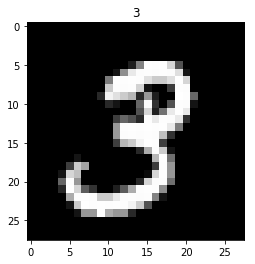

In [3]:
# plot one example
print(train_x.shape)     # (55000, 28 * 28)
print(train_y.shape)   # (55000, 10)
plt.imshow(train_x[1].reshape((28, 28)), cmap='gray')
# plt.imshow(train_x[1].reshape((28, 28)))
plt.title('%i' % np.argmax(train_y[1])); plt.show()

In [4]:
tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
image = tf.reshape(tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])            # input y

In [5]:
# CNN
conv1 = tf.layers.conv2d(   # shape (28, 28, 1)
    inputs=image,
    filters = 16,
    kernel_size = 5,
    strides = 1,
    padding = 'same', # "valid" 或者 "same"（不区分大小写）。"valid" 表示不够卷积核大小的块就丢弃，"same"表示不够卷积核大小的块就补0。
    activation = tf.nn.relu
)           # -> (28, 28, 16)
pool1 = tf.layers.max_pooling2d(
    inputs = conv1,
    pool_size = 2,
    strides = 2,
)           # -> (14, 14, 16)

conv2 = tf.layers.conv2d(
    inputs = pool1,
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation=tf.nn.relu
)    # -> (14, 14, 32)

pool2 = tf.layers.max_pooling2d(
    inputs = conv2,
    pool_size = 2,
    strides = 2
)    # -> (7, 7, 32)
flat = tf.reshape(pool2, [-1, 7*7*32])          # -> (7*7*32)

output = tf.layers.dense(flat, 10)              # 全连接层output layer

In [6]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

In [11]:
for step in range(60000):
    b_x, b_y = mnist.train.next_batch(50)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_, output_ = sess.run([accuracy,output], {tf_x: test_x, tf_y: test_y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.10f' % accuracy_,output_)

Step: 0 | train loss: 0.0006 | test accuracy: 0.9905638099 [[-56.545288   -46.78066    -30.593307   ...  55.2573     -56.377136
  -29.558792  ]
 [-29.22261    -39.33299     68.66449    ... -68.75577    -29.601383
  -48.075512  ]
 [-52.83092     32.86892    -38.253113   ...   0.91463655 -28.162785
  -43.156094  ]
 ...
 [-97.32413    -38.218296   -69.15616    ... -32.459213   -19.987595
  -17.704365  ]
 [-26.73702    -56.660534   -65.190315   ... -65.1972       4.2735095
  -48.83556   ]
 [-15.493632   -55.602898   -33.702324   ... -86.78318    -25.275513
  -55.38448   ]]
Step: 50 | train loss: 0.0000 | test accuracy: 0.9905649424 [[-57.391758  -52.843754  -33.024994  ...  57.64812   -56.891903
  -30.166847 ]
 [-26.037918  -40.335796   65.94853   ... -74.24232   -30.743776
  -47.033363 ]
 [-51.64352    31.972076  -39.03113   ...  -1.6365328 -26.954988
  -43.64575  ]
 ...
 [-98.56101   -45.032864  -73.21927   ... -33.762196  -17.489977
  -17.837069 ]
 [-24.378883  -59.27716   -71.56811   .

Step: 750 | train loss: 0.0000 | test accuracy: 0.9905731082 [[-52.89826   -51.550488  -33.015743  ...  60.918415  -47.68418
  -30.144361 ]
 [-33.343872  -29.790083   52.964916  ... -74.48308   -25.203707
  -32.864872 ]
 [-51.711193   27.940226  -35.630722  ...  -4.4662986 -14.669304
  -34.51961  ]
 ...
 [-92.00651   -38.250183  -70.27559   ... -34.933315   -4.8980474
  -19.277336 ]
 [-21.296047  -57.83091   -72.625465  ... -61.810474    5.857698
  -41.0789   ]
 [-24.857674  -47.80165   -38.291298  ... -85.72837   -32.076927
  -52.05595  ]]
Step: 800 | train loss: 0.0001 | test accuracy: 0.9905732274 [[-49.106068  -52.692684  -33.028168  ...  61.51348   -48.5265
  -28.076586 ]
 [-31.287281  -32.42508    55.041084  ... -75.91926   -26.252735
  -32.161873 ]
 [-49.793842   26.121117  -34.92786   ...  -4.320404  -14.690768
  -32.26597  ]
 ...
 [-89.4628    -38.846844  -71.75522   ... -35.26995    -4.6813107
  -15.859751 ]
 [-18.524052  -59.66651   -75.307945  ... -62.498512    5.0830894
  

Step: 1500 | train loss: 0.0000 | test accuracy: 0.9905796051 [[-53.00231    -52.88456    -32.410423   ...  65.471214   -58.257774
  -29.537996  ]
 [-41.395123   -23.132208    55.670166   ... -78.81353    -29.12115
  -46.675682  ]
 [-46.773563    27.651773   -36.814194   ...   0.84728205 -14.785475
  -33.89252   ]
 ...
 [-90.52598    -35.31123    -71.2583     ... -34.00025     -7.5535154
  -15.019686  ]
 [-30.995014   -47.895863   -73.2507     ... -64.38638      5.6081066
  -47.3091    ]
 [-21.156767   -52.64111    -33.11664    ... -90.32543    -40.730972
  -63.295273  ]]
Step: 1550 | train loss: 0.0000 | test accuracy: 0.9905800819 [[-56.43605   -52.403084  -35.05543   ...  66.53895   -58.142216
  -29.215338 ]
 [-39.92701   -23.099216   55.777973  ... -78.162346  -26.30158
  -47.968426 ]
 [-50.446236   29.15392   -39.642887  ...   0.7534106 -15.334551
  -36.29402  ]
 ...
 [-92.4679    -35.775303  -72.784424  ... -34.668266   -6.0738997
  -18.133331 ]
 [-29.30588   -48.703888  -70.7638

Step: 2250 | train loss: 0.0000 | test accuracy: 0.9905934334 [[ -55.13993    -56.410755   -32.182186  ...   58.838158   -46.606213
   -18.946379 ]
 [ -46.406124   -26.368818    64.57472   ...  -80.24331    -31.055998
   -31.929296 ]
 [ -51.167522    20.295496   -34.801067  ...   -1.8232474  -13.589329
   -31.07565  ]
 ...
 [ -95.84615    -41.408047   -71.13243   ...  -40.592712    -4.741218
   -15.593418 ]
 [ -35.53656    -60.53238    -67.53996   ...  -66.17709     12.570582
   -44.24633  ]
 [ -26.199259   -54.02181    -29.966078  ... -101.80508    -34.03277
   -63.129387 ]]
Step: 2300 | train loss: 0.0040 | test accuracy: 0.9905944467 [[ -51.36498    -55.229404   -38.18627   ...   58.548763   -46.037197
   -18.176775 ]
 [ -36.819412   -25.98761     58.589615  ...  -82.30122    -29.83109
   -32.83951  ]
 [ -45.53712     20.571644   -40.961082  ...   -2.7935498  -12.512826
   -29.980078 ]
 ...
 [ -89.242294   -42.03829    -77.05849   ...  -43.01816     -2.7741168
   -13.505462 ]
 [ -28

Step: 3000 | train loss: 0.0005 | test accuracy: 0.9906015396 [[-53.125084   -50.154972   -29.57725    ...  62.658386   -42.17776
  -24.858917  ]
 [-29.702682   -26.4483      52.974224   ... -70.51804    -27.297674
  -40.33293   ]
 [-46.2358      23.513275   -38.26264    ...  -0.16234128 -11.272179
  -37.846832  ]
 ...
 [-90.7912     -34.353745   -73.57865    ... -41.01425     -4.8259416
  -21.7024    ]
 [-28.935461   -48.832687   -69.95932    ... -58.528557     6.2534866
  -45.434593  ]
 [-23.949951   -54.452      -38.08868    ... -81.47825    -31.883535
  -59.665863  ]]
Step: 3050 | train loss: 0.0000 | test accuracy: 0.9906023145 [[-53.013206   -50.609604   -29.361782   ...  62.665436   -42.177204
  -24.946749  ]
 [-29.742384   -26.957867    53.149296   ... -70.68371    -27.232727
  -40.235     ]
 [-46.10627     23.238781   -37.87451    ...  -0.34553033 -11.288283
  -37.90087   ]
 ...
 [-90.86635    -35.09583    -73.178185   ... -41.151665    -4.7202973
  -21.684313  ]
 [-29.150818 

Step: 3750 | train loss: 0.0002 | test accuracy: 0.9906076193 [[-51.251377  -49.191936  -38.77257   ...  65.94386   -53.557167
  -26.062431 ]
 [-37.63498   -28.7653     52.798893  ... -74.35179   -36.758568
  -34.46819  ]
 [-51.000774   26.05801   -40.10673   ...  -7.1034226 -15.750144
  -40.905098 ]
 ...
 [-93.82266   -33.823444  -81.89628   ... -44.496063  -10.768077
  -20.22174  ]
 [-29.7296    -51.627773  -67.639366  ... -57.70078     0.9427033
  -51.88039  ]
 [-22.145618  -50.969334  -39.16584   ... -84.419876  -37.32722
  -58.543255 ]]
Step: 3800 | train loss: 0.0000 | test accuracy: 0.9906082749 [[-51.42865   -49.12587   -38.616047  ...  65.87138   -53.77189
  -25.992352 ]
 [-37.303272  -28.74215    53.314667  ... -74.24693   -37.044968
  -34.854298 ]
 [-51.41738    26.181288  -39.91782   ...  -7.0161443 -16.1314
  -41.33829  ]
 ...
 [-93.97342   -33.929893  -81.60746   ... -44.833237  -10.977589
  -20.684147 ]
 [-28.981054  -52.244095  -66.60406   ... -57.812687    0.3254155
  

Step: 4500 | train loss: 0.0000 | test accuracy: 0.9906191826 [[-46.45559   -51.809544  -30.559404  ...  59.600876  -57.95084
  -33.148052 ]
 [-36.678516  -34.18986    52.996212  ... -78.56009   -30.574232
  -41.32661  ]
 [-39.48465    24.916483  -39.304417  ...  -7.026912  -18.208906
  -40.0044   ]
 ...
 [-97.13699   -36.411472  -79.28616   ... -49.77746   -13.866114
  -16.395258 ]
 [-35.352158  -53.244896  -70.84935   ... -64.02556     5.5196424
  -57.05216  ]
 [-21.823248  -51.908424  -37.858036  ... -97.09445   -31.618914
  -61.79234  ]]
Step: 4550 | train loss: 0.0000 | test accuracy: 0.9906195998 [[-45.18258   -53.28416   -29.333067  ...  58.68482   -57.042522
  -33.944107 ]
 [-37.26262   -33.85666    54.190063  ... -80.04363   -30.383837
  -42.288273 ]
 [-37.42228    23.81401   -38.20176   ...  -7.9641504 -17.029867
  -37.092762 ]
 ...
 [-97.33032   -38.052456  -77.24801   ... -52.175327  -12.130642
  -15.075217 ]
 [-36.763123  -53.333675  -71.75982   ... -64.965836    6.7440605

Step: 5300 | train loss: 0.0003 | test accuracy: 0.9906253219 [[-55.2351    -55.52121   -30.60342   ...  63.199028  -46.704914
  -33.703842 ]
 [-42.835667  -35.32408    55.95708   ... -64.03257   -33.394302
  -30.582651 ]
 [-42.184696   24.464727  -35.98835   ...  -3.6002212 -14.667078
  -32.536957 ]
 ...
 [-91.81237   -29.90923   -72.91101   ... -37.28847   -12.4971075
   -9.173437 ]
 [-36.507374  -49.588024  -77.24121   ... -53.62547   -11.908884
  -42.132034 ]
 [-32.225903  -52.97469   -39.0798    ... -67.20147   -41.194126
  -54.916748 ]]
Step: 5350 | train loss: 0.0000 | test accuracy: 0.9906262755 [[-63.80024   -43.750816  -36.05719   ...  62.51197   -49.695526
  -30.094547 ]
 [-37.62404   -32.992638   57.54137   ... -72.806984  -27.400024
  -33.92615  ]
 [-48.79135    30.542229  -39.91271   ...  -4.6463323 -20.290527
  -36.664806 ]
 ...
 [-99.28423   -28.555687  -78.43511   ... -46.73251   -14.436
  -12.928914 ]
 [-32.26055   -51.774513  -75.1468    ... -58.404106   -7.3855586
 

Step: 6100 | train loss: 0.0000 | test accuracy: 0.9906331301 [[-52.752365   -43.275017   -32.18982    ...  58.73364    -48.824715
  -29.774141  ]
 [-34.247383   -33.95936     57.60091    ... -72.37426    -27.70041
  -39.508865  ]
 [-38.3172      29.397541   -38.422874   ...  -3.109281   -16.473349
  -32.62601   ]
 ...
 [-84.393005   -32.825302   -75.51893    ... -36.388058   -10.046981
   -3.6287174 ]
 [-32.238388   -52.491432   -72.37775    ... -62.171413     0.16607511
  -48.130947  ]
 [-13.804724   -59.582638   -41.13269    ... -88.10866    -27.471064
  -58.939186  ]]
Step: 6150 | train loss: 0.0000 | test accuracy: 0.9906328917 [[-59.003754   -42.536427   -34.97113    ...  58.987427   -53.086193
  -31.57712   ]
 [-34.98726    -34.346954    50.374958   ... -63.96602    -22.851603
  -41.902298  ]
 [-46.830154    31.40606    -41.595615   ...  -1.9587041  -21.853838
  -38.983368  ]
 ...
 [-85.95455    -27.614412   -71.98122    ... -29.645348   -12.642684
  -17.668688  ]
 [-28.497318  

Step: 6850 | train loss: 0.0000 | test accuracy: 0.9906398058 [[-62.06662   -48.169125  -31.676966  ...  55.922894  -53.920204
  -28.807714 ]
 [-40.675556  -23.590675   53.846622  ... -75.9599    -23.962376
  -38.43393  ]
 [-45.143906   33.838047  -45.45042   ...  -2.8995788 -16.632385
  -28.999079 ]
 ...
 [-92.042656  -32.823345  -74.57819   ... -34.88181   -12.383989
  -10.9487   ]
 [-31.439915  -44.761127  -68.37714   ... -61.342342    2.783827
  -44.486313 ]
 [-16.5107    -53.173767  -41.453815  ... -82.40537   -32.509174
  -54.606133 ]]
Step: 6900 | train loss: 0.0000 | test accuracy: 0.9906399250 [[-53.859756   -51.551888   -37.31191    ...  55.74316    -52.16877
  -28.583246  ]
 [-37.83043    -21.635296    47.088703   ... -74.09974    -27.815384
  -35.58557   ]
 [-40.770725    32.96788    -46.19143    ...  -4.588392   -16.565102
  -27.710667  ]
 ...
 [-86.53117    -32.78957    -76.98583    ... -36.347527   -10.153857
   -9.237484  ]
 [-26.63074    -45.219353   -74.295975   ... -

Step: 7600 | train loss: 0.0000 | test accuracy: 0.9906492829 [[-59.921688  -56.514843  -39.002293  ...  62.559986  -58.414196
  -30.645338 ]
 [-38.57072   -46.247875   54.1773    ... -85.58873   -19.050262
  -45.511562 ]
 [-48.236805   28.652142  -41.439606  ...  -6.4228015 -20.633842
  -35.15925  ]
 ...
 [-99.637535  -47.478497  -78.14681   ... -38.4343    -15.267107
  -16.606771 ]
 [-28.512209  -66.92707   -79.87913   ... -71.99155     1.5387236
  -55.76363  ]
 [-23.756987  -76.97998   -46.137306  ... -88.99497   -37.934593
  -70.83981  ]]
Step: 7650 | train loss: 0.0000 | test accuracy: 0.9906497598 [[ -60.796177   -50.9577     -40.672424  ...   58.606834   -61.916367
   -30.310352 ]
 [ -43.17812    -41.70499     52.82068   ...  -89.38158    -21.003742
   -49.521683 ]
 [ -48.304356    34.156338   -44.050217  ...  -11.45575    -23.070423
   -37.38182  ]
 ...
 [-101.4659     -38.51463    -75.91618   ...  -46.60966    -15.888505
   -19.395182 ]
 [ -35.658184   -62.41695    -81.657585 

Step: 8350 | train loss: 0.0000 | test accuracy: 0.9906506538 [[-53.075157  -54.534924  -31.578014  ...  54.822083  -53.705254
  -35.837746 ]
 [-43.35728   -27.631838   49.069847  ... -74.196945  -26.859032
  -41.708683 ]
 [-41.634995   31.055582  -36.929615  ...  -5.1037455 -23.036407
  -38.179276 ]
 ...
 [-87.022964  -36.727314  -71.0744    ... -34.887802   -7.117955
  -18.62009  ]
 [-28.908989  -45.328503  -73.531006  ... -62.703865   -1.1271493
  -48.68519  ]
 [-30.53961   -64.54414   -40.90115   ... -80.851265  -38.41443
  -57.27514  ]]
Step: 8400 | train loss: 0.0000 | test accuracy: 0.9906510115 [[-53.620323  -54.86043   -31.709566  ...  55.863598  -54.421497
  -37.438263 ]
 [-43.432632  -28.168566   49.543808  ... -74.61774   -27.940805
  -44.046104 ]
 [-41.88108    31.144901  -37.662804  ...  -5.1071415 -23.189638
  -39.356827 ]
 ...
 [-88.089226  -37.437443  -70.7012    ... -35.098366   -6.7402697
  -20.990746 ]
 [-29.044338  -45.555126  -73.5449    ... -62.90368    -1.231263

Step: 9100 | train loss: 0.0000 | test accuracy: 0.9906576872 [[-53.396023  -62.569542  -28.450573  ...  55.607697  -53.935215
  -38.85816  ]
 [-39.75887   -29.97532    53.883953  ... -89.0212    -23.954815
  -46.889004 ]
 [-36.831543   28.659874  -36.116753  ...  -8.228614  -22.410501
  -41.601246 ]
 ...
 [-95.761345  -39.077362  -74.00418   ... -37.76976    -2.996067
  -21.099451 ]
 [-30.622269  -49.829346  -77.12885   ... -70.530716   -1.9247283
  -56.833538 ]
 [-39.616497  -67.92304   -42.529583  ... -92.06986   -36.721096
  -57.61833  ]]
Step: 9150 | train loss: 0.0000 | test accuracy: 0.9906579852 [[-53.544655  -62.48778   -28.641075  ...  55.83483   -54.090374
  -38.579918 ]
 [-39.636604  -29.960707   53.92824   ... -88.97936   -24.077868
  -46.750664 ]
 [-36.968193   28.722494  -36.21844   ...  -8.192519  -22.500076
  -41.549305 ]
 ...
 [-95.75015   -39.093025  -74.06868   ... -37.756264   -3.0801482
  -21.024815 ]
 [-30.549307  -49.828854  -77.124435  ... -70.40051    -2.01316

Step: 9850 | train loss: 0.0000 | test accuracy: 0.9906570315 [[-68.14811   -66.0945    -34.6059    ...  55.41531   -64.85174
  -25.528278 ]
 [-30.46516   -39.84374    53.89158   ... -83.78119   -29.924995
  -40.289196 ]
 [-44.726868   30.410444  -41.4395    ...  -4.3235817 -23.14583
  -44.112984 ]
 ...
 [-96.69755   -47.59489   -79.95131   ... -47.0083      2.434426
  -22.164806 ]
 [-26.461628  -63.49236   -71.557465  ... -74.19379    -3.2168353
  -49.77539  ]
 [-30.179216  -77.878815  -44.496803  ... -83.76155   -37.02412
  -63.66976  ]]
Step: 9900 | train loss: 0.0000 | test accuracy: 0.9906575084 [[-69.349785  -65.12875   -34.707848  ...  55.746796  -65.30197
  -26.254921 ]
 [-32.217068  -38.71496    53.84424   ... -84.43065   -30.21256
  -41.58227  ]
 [-46.89437    30.516363  -41.288048  ...  -4.293491  -23.001303
  -44.74037  ]
 ...
 [-99.37888   -47.194237  -79.470604  ... -47.58821     2.3782904
  -23.562185 ]
 [-27.880917  -63.1645    -71.38681   ... -74.50404    -3.4930792
  

Step: 10600 | train loss: 0.0000 | test accuracy: 0.9906632304 [[-62.890713  -61.260845  -37.547935  ...  55.46781   -55.93464
  -29.41565  ]
 [-29.82871   -35.898888   56.232113  ... -84.84849   -28.11829
  -45.17669  ]
 [-50.340054   32.16978   -43.448204  ...  -6.9807897 -23.381393
  -50.526237 ]
 ...
 [-93.30676   -43.63742   -79.38492   ... -48.239258   -2.3112633
  -26.74103  ]
 [-26.149237  -61.33045   -71.05522   ... -73.35436    -6.1088567
  -55.382072 ]
 [-32.223392  -73.64701   -47.23412   ... -81.78587   -37.67327
  -63.213768 ]]
Step: 10650 | train loss: 0.0000 | test accuracy: 0.9906637669 [[-61.206448  -74.34936   -35.488583  ...  60.767174  -55.92278
  -31.622978 ]
 [-35.209026  -41.86859    57.386013  ... -79.980705  -29.056845
  -44.34472  ]
 [-47.99008    30.677448  -41.855625  ...  -5.497248  -22.89224
  -49.43562  ]
 ...
 [-97.04679   -47.704185  -79.80547   ... -43.32547    -3.6284287
  -23.646498 ]
 [-31.325882  -66.144966  -72.979126  ... -70.64736    -5.4498663

Step: 11350 | train loss: 0.0000 | test accuracy: 0.9906733036 [[ -66.60145    -63.971428   -33.610382  ...   59.30442    -57.959114
   -36.03984  ]
 [ -32.102135   -25.305256    62.517727  ... -101.478935   -33.456627
   -52.878223 ]
 [ -46.10379     35.695503   -40.735954  ...   -9.867596   -21.865265
   -48.034687 ]
 ...
 [ -93.202705   -33.809242   -73.17757   ...  -41.932396    -8.705313
   -26.411268 ]
 [ -32.291374   -60.511826   -77.67505   ...  -80.61093     -0.9060563
   -60.16252  ]
 [ -28.169395   -58.681267   -44.613697  ...  -99.91036    -38.970318
   -73.17832  ]]
Step: 11400 | train loss: 0.0000 | test accuracy: 0.9906733632 [[-70.20709    -66.785446   -38.917313   ...  64.87743    -56.89019
  -34.62335   ]
 [-36.075226   -31.009937    59.11631    ... -88.82215    -33.467342
  -56.399303  ]
 [-53.474262    32.59016    -40.56577    ...  -6.550821   -23.746353
  -53.144436  ]
 ...
 [-95.52668    -36.742725   -70.62676    ... -35.801918   -10.193826
  -35.073112  ]
 [-31.9

Step: 12100 | train loss: 0.0000 | test accuracy: 0.9906811714 [[-65.014366   -59.928173   -35.417416   ...  55.09573    -58.091194
  -22.250149  ]
 [-34.594807   -26.96559     55.645203   ... -72.085175   -26.931652
  -35.659824  ]
 [-51.853535    29.526268   -41.319942   ...  -0.56807137 -24.324524
  -40.490158  ]
 ...
 [-96.08179    -37.16216    -72.35526    ... -47.444683   -10.87848
  -21.036268  ]
 [-23.464539   -51.752842   -67.37897    ... -60.779102   -10.136218
  -44.564037  ]
 [-28.09386    -58.31677    -39.485195   ... -73.82844    -38.941753
  -55.012512  ]]
Step: 12150 | train loss: 0.0000 | test accuracy: 0.9906815290 [[-64.21872   -60.68236   -35.027367  ...  54.47517   -56.35499
  -23.591349 ]
 [-34.702316  -27.192396   55.59577   ... -72.20494   -26.000103
  -37.603924 ]
 [-51.346664   28.98549   -41.066963  ...  -1.1877841 -23.303572
  -40.65535  ]
 ...
 [-95.42605   -37.34545   -72.354485  ... -47.27776   -10.008207
  -21.67808  ]
 [-23.51783   -51.887794  -67.37675

Step: 12850 | train loss: 0.0000 | test accuracy: 0.9906871319 [[-53.589382  -60.26192   -35.33104   ...  54.323772  -41.641582
  -25.120655 ]
 [-29.659416  -27.29641    49.230217  ... -66.156     -32.488
  -30.101048 ]
 [-43.083317   31.207426  -36.211647  ...  -5.8028474 -18.433863
  -36.747353 ]
 ...
 [-78.83671   -28.749626  -70.48089   ... -31.792814   -8.902192
  -13.913197 ]
 [-26.115864  -50.978596  -69.707695  ... -59.504726   -3.3247926
  -45.44684  ]
 [-22.051348  -59.936954  -41.59709   ... -84.66697   -34.82301
  -55.9887   ]]
Step: 12900 | train loss: 0.0767 | test accuracy: 0.9906876683 [[-54.467438  -58.852745  -35.8589    ...  54.551582  -43.389534
  -26.69898  ]
 [-28.214209  -27.946785   48.865612  ... -66.05413   -32.663593
  -27.94372  ]
 [-41.989918   31.363451  -36.635822  ...  -4.998759  -21.532509
  -32.983883 ]
 ...
 [-80.619385  -29.060686  -68.54683   ... -30.564396   -8.179887
  -13.649597 ]
 [-26.018948  -49.527508  -68.643616  ... -59.14024    -2.8037791


Step: 13600 | train loss: 0.0000 | test accuracy: 0.9907001257 [[-56.4332    -55.499405  -30.879171  ...  56.368584  -45.761616
  -27.680416 ]
 [-33.90805   -28.648151   61.167904  ... -73.44126   -35.839462
  -32.182827 ]
 [-45.474842   30.431633  -33.467865  ...  -2.646114  -20.798794
  -37.29473  ]
 ...
 [-81.87944   -30.79787   -68.10489   ... -29.065817   -8.242844
  -15.143386 ]
 [-26.019821  -52.348946  -66.06475   ... -59.52183    -2.1414635
  -48.11052  ]
 [-25.490795  -61.215923  -40.9059    ... -91.33933   -31.293217
  -57.724262 ]]
Step: 13650 | train loss: 0.0000 | test accuracy: 0.9907008410 [[-56.481625  -55.485836  -30.949608  ...  56.35934   -45.802803
  -27.624151 ]
 [-33.886448  -28.633741   61.13041   ... -73.47824   -35.82548
  -32.218014 ]
 [-45.542603   30.467884  -33.560314  ...  -2.6425402 -20.826448
  -37.298336 ]
 ...
 [-81.9062    -30.814754  -68.18453   ... -29.118128   -8.262525
  -15.152262 ]
 [-25.982498  -52.353706  -66.07608   ... -59.55208    -2.14032

Step: 14400 | train loss: 0.0000 | test accuracy: 0.9907129407 [[-58.670692  -53.07664   -34.139843  ...  57.528263  -47.871525
  -28.598946 ]
 [-32.630116  -32.087856   59.37953   ... -69.60852   -35.559296
  -33.87914  ]
 [-47.934708   31.645475  -34.824055  ...  -2.492188  -22.987806
  -40.034332 ]
 ...
 [-83.55588   -29.971956  -69.20366   ... -30.922039   -8.61911
  -17.876234 ]
 [-25.976639  -52.424854  -66.92089   ... -58.997887   -2.2179496
  -48.01844  ]
 [-25.011656  -64.46704   -42.73243   ... -86.48439   -32.074917
  -57.836113 ]]
Step: 14450 | train loss: 0.0000 | test accuracy: 0.9907137156 [[-58.51971   -53.066723  -34.122234  ...  57.15151   -47.640377
  -28.632975 ]
 [-32.611805  -32.122204   59.48974   ... -70.27679   -35.43005
  -33.786526 ]
 [-47.90926    31.607002  -34.86556   ...  -2.6270764 -22.870949
  -39.983902 ]
 ...
 [-83.44089   -29.912127  -69.29022   ... -31.07494    -8.473171
  -17.858767 ]
 [-26.04619   -52.567898  -67.04597   ... -59.24161    -2.152396

Step: 15150 | train loss: 0.0000 | test accuracy: 0.9907250404 [[-58.112534  -56.45953   -33.247105  ...  56.761234  -47.328815
  -28.386877 ]
 [-32.815365  -35.329464   59.53792   ... -71.238945  -34.38661
  -32.668964 ]
 [-47.712055   29.782402  -34.89765   ...  -3.7923317 -21.483234
  -39.696434 ]
 ...
 [-83.06816   -32.99399   -69.55431   ... -32.38342    -7.0763326
  -16.836231 ]
 [-26.229097  -54.319344  -67.38301   ... -60.19841    -1.9393357
  -48.457348 ]
 [-25.033138  -65.852104  -42.89049   ... -87.62051   -32.476627
  -57.91253  ]]
Step: 15200 | train loss: 0.0000 | test accuracy: 0.9907258153 [[-58.160023  -56.455     -33.26002   ...  56.86597   -47.36156
  -28.441666 ]
 [-32.834305  -35.30457    59.538586  ... -71.22996   -34.39342
  -32.694798 ]
 [-47.756603   29.818794  -34.95567   ...  -3.752309  -21.503876
  -39.7226   ]
 ...
 [-83.09354   -32.962925  -69.63058   ... -32.28409    -7.097341
  -16.884228 ]
 [-26.228065  -54.328945  -67.431984  ... -60.13651    -1.955191

Step: 15900 | train loss: 0.0000 | test accuracy: 0.9907371402 [[-58.84211   -55.99821   -33.568905  ...  56.98234   -47.619453
  -28.090984 ]
 [-32.970833  -33.590244   59.337868  ... -71.243324  -34.58054
  -32.838585 ]
 [-48.360954   31.193771  -35.587887  ...  -3.3666403 -21.819511
  -39.614796 ]
 ...
 [-83.55905   -31.909348  -69.79327   ... -32.086914   -7.5284076
  -16.801704 ]
 [-26.189962  -53.802296  -67.369316  ... -59.99883    -2.0600755
  -48.276615 ]
 [-24.986612  -64.737915  -43.22247   ... -87.215195  -32.64223
  -58.13352  ]]
Step: 15950 | train loss: 0.0000 | test accuracy: 0.9907379150 [[-58.858955 -56.020428 -33.567444 ...  56.99213  -47.63417  -28.083128]
 [-32.994324 -33.601635  59.35135  ... -71.244415 -34.595238 -32.834877]
 [-48.373394  31.18565  -35.583805 ...  -3.359039 -21.828415 -39.616737]
 ...
 [-83.57765  -31.919842 -69.791985 ... -32.09524   -7.537745 -16.796505]
 [-26.210733 -53.80761  -67.37411  ... -60.01058   -2.069313 -48.27668 ]
 [-25.010544 -64.7

Step: 16700 | train loss: 0.0000 | test accuracy: 0.9907498360 [[-59.16812   -56.26783   -33.587395  ...  57.225418  -47.91488
  -28.149088 ]
 [-33.14968   -33.587616   59.449764  ... -71.525215  -34.721832
  -33.116203 ]
 [-48.699814   31.193394  -35.874382  ...  -3.272016  -21.892193
  -39.721546 ]
 ...
 [-83.975975  -32.349106  -70.08961   ... -32.06515    -7.7059937
  -16.845127 ]
 [-26.339886  -53.872498  -67.51419   ... -60.15546    -2.1287253
  -48.422073 ]
 [-25.103117  -64.79935   -43.301945  ... -87.39388   -32.793106
  -58.42032  ]]
Step: 16750 | train loss: 0.0000 | test accuracy: 0.9907506704 [[-59.218765  -56.282207  -33.602795  ...  57.233223  -47.91311
  -28.138079 ]
 [-33.15392   -33.613174   59.453526  ... -71.54984   -34.7198
  -33.111446 ]
 [-48.743347   31.18647   -35.889973  ...  -3.2762454 -21.885317
  -39.72187  ]
 ...
 [-84.01275   -32.380585  -70.1122    ... -32.09836    -7.692327
  -16.847794 ]
 [-26.347881  -53.89335   -67.50864   ... -60.17023    -2.1061058

Step: 17450 | train loss: 0.0000 | test accuracy: 0.9907616377 [[-59.5612    -56.3953    -33.66957   ...  57.5994    -48.4014
  -28.292988 ]
 [-33.27625   -33.627304   59.616257  ... -71.963806  -34.848957
  -33.417004 ]
 [-49.096073   31.341965  -36.130905  ...  -3.305894  -22.085783
  -39.975937 ]
 ...
 [-84.47454   -32.71366   -70.40081   ... -32.17156    -7.9351377
  -16.951643 ]
 [-26.567204  -54.04306   -67.652794  ... -60.368256   -2.2300785
  -48.671165 ]
 [-25.070782  -64.99426   -43.407646  ... -87.75978   -32.973377
  -58.621014 ]]
Step: 17500 | train loss: 0.0000 | test accuracy: 0.9907624125 [[-59.569427  -56.41918   -33.693157  ...  57.589626  -48.368538
  -28.278206 ]
 [-33.302994  -33.612152   59.58934   ... -71.93536   -34.81518
  -33.461014 ]
 [-49.12781    31.342543  -36.166847  ...  -3.3029106 -22.049185
  -39.954666 ]
 ...
 [-84.50567   -32.732735  -70.438705  ... -32.191677   -7.931115
  -16.904757 ]
 [-26.556526  -54.056786  -67.64119   ... -60.38217    -2.197366

Step: 18250 | train loss: 0.0000 | test accuracy: 0.9907733202 [[-60.045944  -56.95038   -33.68767   ...  57.96392   -48.852978
  -28.290197 ]
 [-33.50671   -33.8459     59.71409   ... -72.29601   -34.843307
  -33.625816 ]
 [-49.426113   31.283358  -36.356438  ...  -3.1348367 -22.137884
  -39.967957 ]
 ...
 [-85.0846    -33.14248   -70.8311    ... -32.214252   -8.101025
  -16.787725 ]
 [-26.793028  -54.267918  -67.86622   ... -60.548294   -2.2368464
  -48.762627 ]
 [-25.286757  -65.24052   -43.546204  ... -88.11697   -33.019638
  -58.85772  ]]
Step: 18300 | train loss: 0.0000 | test accuracy: 0.9907739758 [[-60.05387   -56.941364  -33.636486  ...  57.950897  -48.900433
  -28.275639 ]
 [-33.49769   -33.808887   59.765347  ... -72.42282   -34.87708
  -33.614326 ]
 [-49.402763   31.312716  -36.325916  ...  -3.1629758 -22.152653
  -39.945343 ]
 ...
 [-85.09005   -33.123943  -70.80571   ... -32.222588   -8.142655
  -16.75767  ]
 [-26.789959  -54.252293  -67.855385  ... -60.591583   -2.27218

Step: 19050 | train loss: 0.0000 | test accuracy: 0.9907846451 [[-60.51278   -57.17991   -33.789124  ...  58.122845  -49.249126
  -28.335443 ]
 [-33.759438  -33.813137   59.884247  ... -72.8686    -35.00901
  -33.995728 ]
 [-49.94258    31.49028   -36.736355  ...  -3.2270932 -22.227377
  -40.240234 ]
 ...
 [-85.85311   -33.57205   -71.37526   ... -32.454994   -8.235746
  -16.850073 ]
 [-27.068466  -54.253586  -68.14767   ... -61.022297   -2.2419674
  -48.941284 ]
 [-25.396677  -65.40269   -43.68313   ... -88.568855  -33.27913
  -59.24836  ]]
Step: 19100 | train loss: 0.0000 | test accuracy: 0.9907854199 [[-60.546616  -57.204666  -33.81785   ...  58.12811   -49.265182
  -28.334274 ]
 [-33.769535  -33.82563    59.884598  ... -72.88521   -35.01535
  -34.029312 ]
 [-49.97386    31.495193  -36.762783  ...  -3.239591  -22.233725
  -40.271908 ]
 ...
 [-85.914345  -33.59412   -71.40953   ... -32.479378   -8.2421875
  -16.875443 ]
 [-27.079554  -54.267548  -68.1588    ... -61.046852   -2.238744

Step: 19850 | train loss: 0.0000 | test accuracy: 0.9907964468 [[-61.114517  -57.555206  -34.01154   ...  58.43114   -49.81052
  -28.32742  ]
 [-33.983303  -34.032436   60.004753  ... -73.4642    -35.16577
  -34.370525 ]
 [-50.41822    31.576763  -37.211338  ...  -3.3266702 -22.343805
  -40.421307 ]
 ...
 [-86.67026   -34.093903  -71.995636  ... -32.72729    -8.478345
  -16.832365 ]
 [-27.33617   -54.55249   -68.45774   ... -61.510273   -2.3567066
  -49.128464 ]
 [-25.531567  -65.708755  -43.893764  ... -89.07137   -33.554974
  -59.641132 ]]
Step: 19900 | train loss: 0.0000 | test accuracy: 0.9907972217 [[-61.154934  -57.483925  -34.07111   ...  58.45507   -49.882843
  -28.302616 ]
 [-33.976353  -33.99069    59.97505   ... -73.46079   -35.192646
  -34.35431  ]
 [-50.42252    31.659466  -37.227592  ...  -3.3663268 -22.366686
  -40.417583 ]
 ...
 [-86.687614  -34.047382  -72.04413   ... -32.722946   -8.523736
  -16.797922 ]
 [-27.339327  -54.533665  -68.48338   ... -61.51114    -2.373893

Step: 20650 | train loss: 0.0000 | test accuracy: 0.9908083081 [[-61.555992  -58.335735  -34.108334  ...  58.852745  -50.30979
  -28.429338 ]
 [-34.185307  -34.25044    60.260326  ... -74.092926  -35.25393
  -34.671635 ]
 [-50.88002    31.487938  -37.551273  ...  -3.2603946 -22.50771
  -40.671593 ]
 ...
 [-87.46601   -34.88773   -72.666115  ... -32.86827    -8.580665
  -16.840046 ]
 [-27.580332  -54.745174  -68.97889   ... -61.9423     -2.3315902
  -49.43225  ]
 [-25.660551  -66.044525  -44.01654   ... -89.64388   -33.72528
  -60.009365 ]]
Step: 20700 | train loss: 0.0000 | test accuracy: 0.9908090234 [[-61.53206   -58.394638  -34.069866  ...  58.840782  -50.277046
  -28.46062  ]
 [-34.216625  -34.28277    60.303493  ... -74.12712   -35.121456
  -34.80356  ]
 [-50.885975   31.459541  -37.560177  ...  -3.2743468 -22.42868
  -40.73961  ]
 ...
 [-87.48407   -34.92535   -72.68299   ... -32.871944   -8.511547
  -16.893667 ]
 [-27.58769   -54.76293   -69.008095  ... -61.971703   -2.2889047
 

Step: 21400 | train loss: 0.0000 | test accuracy: 0.9908195734 [[-62.279274  -58.489716  -34.41971   ...  59.219727  -50.732754
  -28.840609 ]
 [-34.698494  -34.353325   60.462326  ... -74.969734  -35.58093
  -35.065548 ]
 [-51.295975   31.764446  -37.865955  ...  -3.6577148 -22.573206
  -40.986515 ]
 ...
 [-88.438354  -35.235683  -73.41571   ... -33.197792   -8.671489
  -16.90061  ]
 [-28.227709  -55.004223  -69.564445  ... -62.637825   -2.4091432
  -49.73809  ]
 [-26.055788  -66.35326   -44.1629    ... -90.19925   -34.098484
  -60.480373 ]]
Step: 21450 | train loss: 0.0000 | test accuracy: 0.9908204079 [[-62.300617  -58.505936  -34.382103  ...  59.22662   -50.768986
  -28.843653 ]
 [-34.726334  -34.375698   60.550583  ... -74.98696   -35.621067
  -35.11589  ]
 [-51.306255   31.74725   -37.803257  ...  -3.650902  -22.599207
  -41.020817 ]
 ...
 [-88.48441   -35.2802    -73.37499   ... -33.21579    -8.683884
  -16.920534 ]
 [-28.246683  -55.032154  -69.53537   ... -62.664898   -2.43268

Step: 22200 | train loss: 0.0000 | test accuracy: 0.9908314347 [[-62.76913   -59.264076  -34.776478  ...  59.59711   -51.34924
  -28.743189 ]
 [-34.96708   -34.608017   60.52647   ... -75.545715  -35.5768
  -35.299767 ]
 [-51.689518   31.631283  -38.412834  ...  -3.611468  -22.662186
  -41.070732 ]
 ...
 [-89.2125    -36.04059   -74.3346    ... -33.52686    -8.799353
  -16.611135 ]
 [-28.477434  -55.22589   -70.23797   ... -63.210346   -2.3734884
  -49.954025 ]
 [-26.13073   -66.65907   -44.562218  ... -90.9246    -34.20601
  -60.86228  ]]
Step: 22250 | train loss: 0.0000 | test accuracy: 0.9908321500 [[-62.84006   -59.213043  -34.74877   ...  59.59727   -51.422318
  -28.770777 ]
 [-34.97549   -34.574234   60.57356   ... -75.679955  -35.608883
  -35.443924 ]
 [-51.763607   31.746403  -38.445194  ...  -3.7038367 -22.692268
  -41.165295 ]
 ...
 [-89.3459    -36.017826  -74.373795  ... -33.610653   -8.827774
  -16.718378 ]
 [-28.468126  -55.203033  -70.22642   ... -63.305176   -2.4100688


Step: 23000 | train loss: 0.0000 | test accuracy: 0.9908432961 [[-63.52834   -59.821495  -34.880737  ...  59.98363   -51.84911
  -29.025265 ]
 [-35.3765    -34.854202   60.9853    ... -76.85483   -35.735813
  -35.96656  ]
 [-52.227764   31.847565  -38.79027   ...  -4.0326695 -22.645546
  -41.71691  ]
 ...
 [-90.31291   -36.741634  -75.05401   ... -34.13307    -8.717598
  -16.950598 ]
 [-28.926907  -55.662724  -70.71465   ... -64.089485   -2.4044697
  -50.519917 ]
 [-26.388815  -67.181114  -44.628822  ... -92.259346  -34.587475
  -61.66168  ]]
Step: 23050 | train loss: 0.0000 | test accuracy: 0.9908440113 [[-63.626354 -59.774475 -34.909622 ...  60.019405 -51.958088 -29.076956]
 [-35.37714  -34.859577  60.91001  ... -76.99249  -35.90411  -36.05032 ]
 [-52.301334  31.887968 -38.8773   ...  -4.037134 -22.765244 -41.79561 ]
 ...
 [-90.39331  -36.73841  -75.12966  ... -34.184654  -8.853576 -17.033184]
 [-28.94318  -55.680767 -70.74385  ... -64.16555   -2.477459 -50.580776]
 [-26.339972 -67.2

Step: 23800 | train loss: 0.0000 | test accuracy: 0.9908568263 [[-64.22755   -60.37572   -35.209557  ...  60.574753  -52.684185
  -29.13181  ]
 [-35.326424  -35.19126    61.0222    ... -77.737816  -36.29951
  -36.5779   ]
 [-52.779114   31.947624  -39.39357   ...  -3.9925401 -23.19739
  -41.97906  ]
 ...
 [-91.27269   -37.262844  -76.02842   ... -34.419277   -9.327182
  -17.005266 ]
 [-29.022186  -55.817013  -71.41993   ... -64.66422    -2.6279736
  -50.92835  ]
 [-26.300735  -67.66131   -45.146782  ... -92.73104   -35.171776
  -62.20875  ]]
Step: 23850 | train loss: 0.0000 | test accuracy: 0.9908576608 [[-64.273415  -60.37859   -35.197407  ...  60.56919   -52.714287
  -29.160624 ]
 [-35.375217  -35.23202    61.02253   ... -77.8615    -36.31004
  -36.556973 ]
 [-52.770462   31.993942  -39.392822  ...  -4.06616   -23.189442
  -41.992416 ]
 ...
 [-91.36198   -37.301876  -76.13277   ... -34.4726     -9.29256
  -16.994907 ]
 [-29.106812  -55.73853   -71.513626  ... -64.86787    -2.6258812


Step: 24600 | train loss: 0.0000 | test accuracy: 0.9908702970 [[-65.45246   -60.688736  -35.78247   ...  61.230095  -53.54919
  -29.40159  ]
 [-36.182217  -35.309612   61.40925   ... -78.91517   -36.413822
  -37.210846 ]
 [-53.59261    32.612576  -40.00889   ...  -4.4906793 -23.33793
  -42.53137  ]
 ...
 [-92.92736   -37.651104  -77.17501   ... -34.848694   -9.511909
  -17.118052 ]
 [-29.86795   -56.002216  -72.45884   ... -65.56567    -2.7419078
  -51.481804 ]
 [-26.897408  -68.00135   -45.549103  ... -93.815834  -35.557617
  -63.047634 ]]
Step: 24650 | train loss: 0.0000 | test accuracy: 0.9908711314 [[-65.4656    -60.73908   -35.787205  ...  61.253937  -53.671757
  -29.351496 ]
 [-36.0759    -35.47273    61.487045  ... -78.99956   -36.475105
  -37.252724 ]
 [-53.53549    32.596626  -40.008354  ...  -4.517702  -23.393003
  -42.564045 ]
 ...
 [-92.95573   -37.77846   -77.15808   ... -34.926605   -9.5657015
  -17.078442 ]
 [-29.848711  -56.103497  -72.44958   ... -65.60912    -2.78619

Step: 25400 | train loss: 0.0000 | test accuracy: 0.9908839464 [[-66.12894   -61.71536   -35.91514   ...  61.80771   -54.115227
  -29.713015 ]
 [-36.576057  -36.07501    61.71448   ... -79.989265  -36.560204
  -37.912678 ]
 [-54.01769    32.48258   -40.498     ...  -4.7135706 -23.345524
  -42.99806  ]
 ...
 [-93.99242   -38.668404  -78.08565   ... -35.05057    -9.511763
  -17.268114 ]
 [-30.279919  -56.689487  -73.27047   ... -66.40614    -2.8134482
  -52.256332 ]
 [-27.020206  -68.67183   -45.870014  ... -94.86428   -36.006416
  -64.03153  ]]
Step: 25450 | train loss: 0.0000 | test accuracy: 0.9908847809 [[-66.237526  -61.667538  -35.98341   ...  61.83428   -54.13328
  -29.687407 ]
 [-36.503284  -35.98969    61.68655   ... -80.06086   -36.47656
  -37.943947 ]
 [-54.0918     32.622646  -40.560883  ...  -4.7343802 -23.37301
  -43.043457 ]
 ...
 [-94.081665  -38.624268  -78.208176  ... -35.10156    -9.485143
  -17.252121 ]
 [-30.236336  -56.62956   -73.32541   ... -66.47552    -2.765982


Step: 26200 | train loss: 0.0000 | test accuracy: 0.9908973575 [[-66.94593   -62.588886  -36.60388   ...  62.43213   -54.736725
  -29.903692 ]
 [-36.900974  -36.437798   62.36042   ... -81.243385  -37.273693
  -38.36415  ]
 [-54.415115   32.31594   -41.00295   ...  -5.0350575 -23.593218
  -43.349945 ]
 ...
 [-95.08637   -39.603607  -79.24693   ... -35.91307    -9.55626
  -17.373796 ]
 [-30.67433   -57.30224   -74.34711   ... -67.46013    -2.9942744
  -52.73328  ]
 [-27.472998  -69.47136   -46.11879   ... -95.92477   -36.543903
  -64.59577  ]]
Step: 26250 | train loss: 0.0000 | test accuracy: 0.9908981919 [[-66.98403   -62.649387  -36.60864   ...  62.472103  -54.74766
  -29.916586 ]
 [-36.90589   -36.53169    62.379562  ... -81.31141   -37.24361
  -38.374725 ]
 [-54.45111    32.270172  -41.014374  ...  -5.0549145 -23.57523
  -43.364197 ]
 ...
 [-95.12114   -39.713715  -79.34347   ... -35.960957   -9.503019
  -17.281599 ]
 [-30.659586  -57.338284  -74.386444  ... -67.52789    -2.9768934


Step: 27000 | train loss: 0.0000 | test accuracy: 0.9909114838 [[-68.289055  -62.670475  -37.32355   ...  63.035328  -55.789642
  -29.99912  ]
 [-37.153015  -36.814636   62.389416  ... -82.63677   -37.745872
  -39.377274 ]
 [-55.38676    32.807316  -41.824383  ...  -5.213292  -24.179424
  -44.186546 ]
 ...
 [-96.67056   -40.16465   -80.58927   ... -36.530235  -10.194485
  -17.679749 ]
 [-31.027134  -57.510944  -75.1975    ... -68.36606    -3.2343318
  -53.365334 ]
 [-27.349102  -70.285164  -47.03015   ... -96.94634   -37.185097
  -65.24186  ]]
Step: 27050 | train loss: 0.0000 | test accuracy: 0.9909124970 [[-68.40242   -62.711597  -37.319347  ...  63.05464   -55.93567
  -29.91208  ]
 [-37.123817  -36.855278   62.52522   ... -82.796974  -37.82905
  -39.520016 ]
 [-55.556835   32.751984  -41.827435  ...  -5.2673273 -24.253637
  -44.309624 ]
 ...
 [-96.844894  -40.28681   -80.54688   ... -36.729797  -10.289437
  -17.864618 ]
 [-31.021723  -57.51336   -75.148476  ... -68.52143    -3.238700

Step: 27800 | train loss: 0.0000 | test accuracy: 0.9909259677 [[-69.40517   -63.705112  -37.59707   ...  64.01156   -56.660507
  -30.53489  ]
 [-38.101162  -37.615044   63.197624  ... -83.63199   -38.180466
  -40.396774 ]
 [-56.23257    32.66999   -42.284824  ...  -5.3187537 -24.32009
  -44.970055 ]
 ...
 [-98.405014  -41.10143   -81.74597   ... -36.899914  -10.133506
  -18.134432 ]
 [-31.806833  -58.18012   -76.481964  ... -69.30425    -3.3447142
  -54.402565 ]
 [-28.176174  -71.11427   -47.40141   ... -97.893     -37.643467
  -66.56257  ]]
Step: 27850 | train loss: 0.0000 | test accuracy: 0.9909267426 [[-69.35361  -63.774612 -37.580326 ...  63.965202 -56.630028 -30.47712 ]
 [-37.9467   -37.531452  63.3001   ... -83.795456 -38.256714 -40.31771 ]
 [-56.00525   32.77254  -42.284626 ...  -5.338016 -24.316677 -44.956264]
 ...
 [-98.36367  -41.043915 -81.722496 ... -36.995758 -10.040527 -18.148438]
 [-31.78752  -58.22628  -76.53016  ... -69.38985   -3.303004 -54.441532]
 [-28.120724 -71.0

Step: 28600 | train loss: 0.0000 | test accuracy: 0.9909400344 [[-70.24905   -64.170975  -38.41167   ...  64.3981    -57.400078
  -30.431322 ]
 [-38.18559   -37.607838   63.704594  ... -85.17178   -38.790115
  -40.694157 ]
 [-56.618725   33.164967  -43.074417  ...  -5.97982   -24.598904
  -45.218723 ]
 ...
 [-99.58446   -41.653236  -82.959915  ... -37.960114  -10.2880125
  -18.367533 ]
 [-31.926155  -58.841488  -77.127815  ... -70.35634    -3.372524
  -54.84224  ]
 [-28.128304  -71.681656  -47.85881   ... -99.037415  -38.273487
  -66.88312  ]]
Step: 28650 | train loss: 0.0000 | test accuracy: 0.9909409285 [[-70.29043   -64.28676   -38.41126   ...  64.462074  -57.419937
  -30.464558 ]
 [-38.22745   -37.624107   63.722206  ... -85.20062   -38.792187
  -40.748276 ]
 [-56.64419    33.172962  -43.0726    ...  -5.9894276 -24.61596
  -45.264854 ]
 ...
 [-99.678444  -41.713196  -82.97394   ... -37.916428  -10.246797
  -18.412477 ]
 [-32.02032   -58.83191   -77.19178   ... -70.40564    -3.36360

Step: 29350 | train loss: 0.0000 | test accuracy: 0.9909526110 [[ -71.60465    -65.12861    -38.581055  ...   65.592834   -58.60984
   -31.134356 ]
 [ -38.785133   -38.37244     63.9604    ...  -86.39496    -39.669033
   -41.718372 ]
 [ -57.20874     33.25817    -43.46253   ...   -5.9261365  -25.140596
   -46.191452 ]
 ...
 [-101.35007    -42.225895   -84.0676    ...  -37.990177   -10.717765
   -19.110863 ]
 [ -32.788597   -59.10666    -78.67019   ...  -71.10606     -3.888114
   -56.211052 ]
 [ -28.692251   -72.449615   -48.717125  ... -100.09066    -39.053547
   -67.982254 ]]
Step: 29400 | train loss: 0.0000 | test accuracy: 0.9909533858 [[ -71.56814    -65.13355    -38.66058   ...   65.41323    -58.415276
   -31.098267 ]
 [ -38.693127   -38.357204    63.88146   ...  -86.5352     -39.509243
   -41.746395 ]
 [ -57.221275    33.215176   -43.50362   ...   -6.1121345  -25.059872
   -46.119858 ]
 ...
 [-101.3652     -42.320576   -84.15624   ...  -38.332508   -10.490843
   -19.07209  ]
 [ -

Step: 30100 | train loss: 0.0000 | test accuracy: 0.9909650683 [[ -72.36569    -65.643486   -39.18746   ...   65.5512     -59.1177
   -31.001257 ]
 [ -39.3013     -39.075882    64.54837   ...  -88.458534   -39.88021
   -42.248802 ]
 [ -57.63383     33.407063   -44.062923  ...   -6.9154267  -25.041128
   -46.366833 ]
 ...
 [-103.02725    -43.443      -85.50095   ...  -39.56118    -10.523207
   -18.807314 ]
 [ -33.449974   -60.13359    -79.89769   ...  -72.85784     -3.6095695
   -56.96767  ]
 [ -29.087448   -73.686874   -49.17076   ... -101.9981     -39.508595
   -68.7407   ]]
Step: 30150 | train loss: 0.0000 | test accuracy: 0.9909659028 [[ -72.35469    -65.85343    -39.250732  ...   65.72454    -59.22079
   -31.022612 ]
 [ -39.213505   -39.30093     64.5779    ...  -88.35758    -39.93293
   -42.34244  ]
 [ -57.528473    33.293728   -44.144405  ...   -6.730708   -25.051157
   -46.384476 ]
 ...
 [-102.97919    -43.588223   -85.65196   ...  -39.4119     -10.556315
   -18.811476 ]
 [ -33.

Step: 30850 | train loss: 0.0000 | test accuracy: 0.9909773469 [[ -73.38729    -66.5961     -39.65997   ...   66.57559    -60.27677
   -31.708097 ]
 [ -39.8994     -39.71644     64.96458   ...  -89.22514    -40.73781
   -43.49527  ]
 [ -58.22382     33.48593    -44.876186  ...   -6.629071   -25.453081
   -47.09448  ]
 ...
 [-104.43755    -43.951126   -86.60499   ...  -39.522263   -11.217189
   -19.627377 ]
 [ -34.046444   -60.81434    -81.15865   ...  -73.23564     -3.9930856
   -58.177322 ]
 [ -29.63486    -74.54914    -49.88086   ... -102.546135   -40.287804
   -69.99275  ]]
Step: 30900 | train loss: 0.0000 | test accuracy: 0.9909781218 [[ -73.50327    -66.40697    -39.830288  ...   66.49064    -60.24369
   -31.641302 ]
 [ -39.813686   -39.57255     64.88185   ...  -89.54876    -40.66042
   -43.44614  ]
 [ -58.261112    33.68652    -44.959522  ...   -6.8362308  -25.458662
   -47.115284 ]
 ...
 [-104.48517    -43.874973   -86.79668   ...  -39.768574   -11.202252
   -19.538818 ]
 [ -33

Step: 31600 | train loss: 0.0000 | test accuracy: 0.9909890890 [[ -74.85858    -67.41122    -40.193466  ...   66.94067    -61.259426
   -31.950073 ]
 [ -40.634136   -40.229115    65.98295   ...  -91.31685    -41.35871
   -44.781216 ]
 [ -59.226246    33.697422   -45.410053  ...   -7.1677604  -25.965563
   -47.926685 ]
 ...
 [-106.51129    -44.61541    -87.86968   ...  -41.005062   -11.432058
   -20.41842  ]
 [ -34.888336   -61.21395    -82.03503   ...  -74.667854    -4.156784
   -59.472294 ]
 [ -30.165857   -75.65961    -50.363323  ... -104.17497    -40.87461
   -71.107925 ]]
Step: 31650 | train loss: 0.0000 | test accuracy: 0.9909898639 [[ -74.929535   -67.45594    -40.28574   ...   67.02097    -61.368614
   -31.967628 ]
 [ -40.612694   -40.213833    65.980484  ...  -91.41752    -41.47149
   -44.849873 ]
 [ -59.204582    33.713066   -45.52883   ...   -7.1208105  -26.031738
   -47.936985 ]
 ...
 [-106.58348    -44.64615    -88.04292   ...  -41.026363   -11.54942
   -20.417915 ]
 [ -34.

Step: 32350 | train loss: 0.0000 | test accuracy: 0.9910005927 [[ -75.703125   -68.151436   -40.94103   ...   67.64628    -61.68755
   -32.294445 ]
 [ -40.73712    -41.008736    66.04989   ...  -92.51554    -41.62377
   -45.12985  ]
 [ -59.652172    33.79798    -46.301067  ...   -7.7290454  -26.028982
   -48.54374  ]
 ...
 [-107.72171    -45.924255   -89.42608   ...  -41.605976   -11.045263
   -20.71504  ]
 [ -35.043262   -62.030167   -83.4484    ...  -75.88279     -3.9526827
   -60.18941  ]
 [ -30.298784   -76.537766   -51.208927  ... -105.06993    -41.338234
   -71.52291  ]]
Step: 32400 | train loss: 0.0000 | test accuracy: 0.9910013080 [[ -75.70117    -68.1697     -40.93944   ...   67.62818    -61.70654
   -32.360172 ]
 [ -40.76585    -40.966537    66.132385  ...  -92.65053    -41.638676
   -45.214554 ]
 [ -59.642746    33.964264   -46.30044   ...   -7.878446   -25.98598
   -48.64225  ]
 ...
 [-107.83942    -45.928947   -89.48081   ...  -41.65869    -11.006993
   -20.807304 ]
 [ -35

Step: 33100 | train loss: 0.0000 | test accuracy: 0.9910119176 [[ -76.8331     -69.49901    -41.27591   ...   68.76637    -62.75438
   -32.91983  ]
 [ -41.77794    -41.808372    66.769936  ...  -93.51755    -42.60586
   -45.966484 ]
 [ -60.266792    33.76969    -46.902805  ...   -7.3998914  -26.252274
   -49.277912 ]
 ...
 [-109.42396    -46.84153    -90.500465  ...  -41.36538    -11.765094
   -21.459663 ]
 [ -35.98916    -62.83864    -84.909134  ...  -76.539116    -4.339928
   -61.29965  ]
 [ -31.063425   -77.449394   -51.800636  ... -106.108665   -42.173534
   -72.86145  ]]
Step: 33150 | train loss: 0.0000 | test accuracy: 0.9910126328 [[ -77.10883    -69.429      -41.396046  ...   68.547356   -62.826675
   -32.703182 ]
 [ -41.82205    -41.78858     66.741455  ...  -93.9924     -42.631905
   -45.788494 ]
 [ -60.326107    33.82355    -46.953175  ...   -7.6203017  -26.343306
   -49.074543 ]
 ...
 [-109.682976   -46.828415   -90.73672   ...  -41.930386   -11.784672
   -21.179575 ]
 [ -3

Step: 33850 | train loss: 0.0000 | test accuracy: 0.9910229445 [[ -78.45479    -70.792725   -42.26835   ...   69.57131    -63.92595
   -33.601658 ]
 [ -42.580063   -42.505142    66.9222    ...  -95.35363    -43.525143
   -47.16882  ]
 [ -61.189663    33.847137   -47.7998    ...   -7.9205236  -26.940392
   -50.046818 ]
 ...
 [-111.27467    -47.5756     -92.32574   ...  -42.49083    -12.393999
   -21.984837 ]
 [ -36.90943    -63.723183   -86.16053   ...  -77.78723     -4.697885
   -62.48774  ]
 [ -31.761581   -78.54535    -52.883675  ... -107.442604   -42.963192
   -73.79032  ]]
Step: 33900 | train loss: 0.0000 | test accuracy: 0.9910236597 [[ -78.54596   -70.82532   -42.326385 ...   69.62689   -63.966335
   -33.648495]
 [ -42.63687   -42.73396    66.96156  ...  -95.41281   -43.423588
   -47.225407]
 [ -61.31398    33.858192  -47.799213 ...   -8.042085  -26.900648
   -50.247875]
 ...
 [-111.43352   -47.71014   -92.405876 ...  -42.563965  -12.262564
   -22.233435]
 [ -36.943916  -63.83194

Step: 34600 | train loss: 0.0000 | test accuracy: 0.9910338521 [[ -79.35585    -71.418785   -43.259773  ...   69.40184    -64.90221
   -33.751995 ]
 [ -43.175976   -43.026527    67.52231   ...  -96.92678    -44.85563
   -48.251106 ]
 [ -61.82945     34.010258   -48.427395  ...   -8.937568   -27.508675
   -50.746212 ]
 ...
 [-112.91984    -48.498646   -93.58757   ...  -44.01527    -12.896537
   -22.651041 ]
 [ -37.57663    -64.524994   -87.231476  ...  -79.50311     -5.1973805
   -63.661793 ]
 [ -32.297836   -79.653885   -53.59551   ... -109.26319    -44.077133
   -75.10801  ]]
Step: 34650 | train loss: 0.0000 | test accuracy: 0.9910345674 [[ -79.418915  -71.40951   -43.454433 ...   69.54067   -64.96494
   -33.850517]
 [ -43.07777   -43.280106   67.41784  ...  -96.96261   -44.7624
   -48.350475]
 [ -61.84526    33.94747   -48.542545 ...   -8.970685  -27.546444
   -50.916737]
 ...
 [-112.98298   -48.737717  -93.73054  ...  -43.994892  -12.822471
   -22.808556]
 [ -37.542294  -64.67429   

Step: 35350 | train loss: 0.0000 | test accuracy: 0.9910445809 [[ -80.51196    -72.607      -43.961674  ...   70.05456    -65.99025
   -34.518642 ]
 [ -44.20301    -43.630444    67.63782   ...  -98.25364    -45.98368
   -48.945328 ]
 [ -62.310116    34.132915   -49.27117   ...   -9.526872   -27.997402
   -51.3602   ]
 ...
 [-114.69701    -49.396122   -95.271164  ...  -44.61681    -13.549189
   -23.02368  ]
 [ -38.752945   -65.280754   -88.884186  ...  -80.76798     -5.4905066
   -65.12445  ]
 [ -33.402607   -80.422935   -54.65506   ... -110.398346   -45.171436
   -76.22115  ]]
Step: 35400 | train loss: 0.0000 | test accuracy: 0.9910452962 [[ -80.93799   -72.37024   -44.04538  ...   70.20736   -66.27244
   -34.756065]
 [ -44.08276   -43.73524    67.55705  ...  -98.65478   -45.953465
   -49.42645 ]
 [ -62.550068   34.548893  -49.242615 ...   -9.936319  -28.220366
   -51.985344]
 ...
 [-115.158905  -49.452316  -95.49122  ...  -44.932716  -13.688057
   -23.847746]
 [ -38.785316  -65.20945 

Step: 36100 | train loss: 0.0000 | test accuracy: 0.9910555482 [[ -82.08359    -73.59014    -44.39431   ...   70.33235    -67.21276
   -35.094475 ]
 [ -45.401768   -45.245693    67.41152   ...  -99.428116   -46.55498
   -50.26344  ]
 [ -63.312134    34.165627   -50.122627  ...   -9.844024   -28.479784
   -52.24404  ]
 ...
 [-116.46147    -49.93648    -96.41205   ...  -45.313126   -14.135865
   -24.210695 ]
 [ -39.855263   -66.13964    -89.99068   ...  -81.75046     -5.6564116
   -66.5467   ]
 [ -34.078194   -81.72323    -55.993736  ... -111.51496    -45.888096
   -77.32702  ]]
Step: 36150 | train loss: 0.0000 | test accuracy: 0.9910562038 [[ -82.03508    -73.70754    -44.414295  ...   70.32983    -67.181335
   -35.286987 ]
 [ -45.47262    -45.450165    67.38543   ...  -99.55074    -46.5582
   -50.354355 ]
 [ -63.310814    34.01037    -50.08292   ...  -10.009506   -28.347958
   -52.4872   ]
 ...
 [-116.470825   -50.097977   -96.421646  ...  -45.357872   -14.074424
   -24.3865   ]
 [ -40

Step: 36850 | train loss: 0.0000 | test accuracy: 0.9910661578 [[ -83.43691    -74.74799    -45.65516   ...   70.59374    -68.6896
   -36.213306 ]
 [ -46.62217    -46.51984     67.60595   ... -101.37132    -48.00598
   -51.7302   ]
 [ -64.453026    34.023376   -51.02288   ...  -11.1837015  -29.397114
   -53.593433 ]
 ...
 [-118.42516    -50.944748   -97.987625  ...  -46.808735   -14.975985
   -25.646912 ]
 [ -40.777893   -67.34284    -91.485146  ...  -83.21047     -6.5877233
   -68.25052  ]
 [ -35.231052   -83.20714    -57.038155  ... -112.58465    -46.998756
   -79.07541  ]]
Step: 36900 | train loss: 0.0000 | test accuracy: 0.9910668731 [[ -83.50274   -74.9151    -45.85582  ...   70.3776    -68.789024
   -35.917625]
 [ -46.726654  -46.556984   67.570274 ... -101.338585  -48.152237
   -51.699516]
 [ -64.491684   33.972366  -51.14001  ...  -11.180271  -29.476978
   -53.461838]
 ...
 [-118.55756   -51.082428  -98.11074  ...  -46.96546   -15.081855
   -25.50289 ]
 [ -40.835014  -67.458084

Step: 37600 | train loss: 0.0000 | test accuracy: 0.9910786152 [[ -85.30515    -76.71677    -47.399433  ...   71.241455   -70.52537
   -36.982906 ]
 [ -48.48644    -48.12466     67.27695   ... -102.39299    -49.850113
   -52.82765  ]
 [ -66.031456    33.066803   -52.568207  ...  -10.87793    -30.65814
   -54.78226  ]
 ...
 [-120.850784   -52.721466  -100.0834    ...  -47.374237   -16.151453
   -26.845938 ]
 [ -42.086292   -69.14758    -93.16999   ...  -84.22447     -7.1951423
   -69.83006  ]
 [ -36.606083   -84.99977    -58.642803  ... -114.08525    -48.050354
   -80.65112  ]]
Step: 37650 | train loss: 0.0000 | test accuracy: 0.9910793304 [[ -85.46686    -76.72191    -47.448597  ...   71.16921    -70.729
   -36.92166  ]
 [ -48.333206   -48.066856    67.147514  ... -102.57497    -49.92385
   -53.133266 ]
 [ -65.99616     33.062637   -52.716526  ...  -10.87246    -30.826567
   -54.905758 ]
 ...
 [-120.901115   -52.690033  -100.101006  ...  -47.617634   -16.434591
   -27.08401  ]
 [ -42.0

Step: 38350 | train loss: 0.0000 | test accuracy: 0.9910900593 [[ -87.095215  -78.95337   -49.027565 ...   70.71973   -72.37009
   -38.849007]
 [ -50.329597  -49.893875   67.00808  ... -105.810844  -51.894115
   -54.878273]
 [ -67.1262     32.291176  -54.093204 ...  -13.047185  -31.690123
   -56.72525 ]
 ...
 [-123.88946   -54.632233 -102.67029  ...  -49.688026  -17.222406
   -29.19414 ]
 [ -44.638412  -70.67501   -96.02165  ...  -87.53476    -8.291819
   -72.70888 ]
 [ -38.272182  -86.54086   -60.13691  ... -117.894     -49.88887
   -82.655815]]
Step: 38400 | train loss: 0.0000 | test accuracy: 0.9910908341 [[ -87.33411   -79.14073   -49.137085 ...   70.77792   -72.47458
   -38.57992 ]
 [ -50.393494  -50.01681    66.79576  ... -105.791275  -51.873825
   -55.04589 ]
 [ -67.258804   32.35231   -54.20097  ...  -12.974403  -31.732122
   -56.834137]
 ...
 [-124.21224   -54.76109  -102.985725 ...  -49.852375  -17.33768
   -29.266598]
 [ -44.773598  -70.73542   -96.30011  ...  -87.82004    -

Step: 39100 | train loss: 0.0000 | test accuracy: 0.9911002517 [[ -88.3741    -81.59186   -51.021404 ...   70.13856   -74.50464
   -40.533283]
 [ -51.456013  -52.28342    66.376205 ... -108.24253   -53.622528
   -57.19263 ]
 [ -68.78137    30.989962  -55.718052 ...  -14.839451  -33.249447
   -59.453037]
 ...
 [-126.50141   -57.327118 -104.76761  ...  -51.905556  -18.230587
   -31.919659]
 [ -45.77962   -72.55528   -98.44347  ...  -90.05967    -9.201278
   -76.264404]
 [ -39.406185  -88.98397   -62.083023 ... -119.36416   -51.332977
   -85.40791 ]]
Step: 39150 | train loss: 0.0000 | test accuracy: 0.9911009073 [[ -88.822586  -81.772354  -51.424515 ...   70.22287   -74.84142
   -40.57906 ]
 [ -51.700306  -52.61647    66.24336  ... -108.47391   -53.984745
   -57.4407  ]
 [ -69.27504    30.77183   -56.127407 ...  -14.850244  -33.65005
   -59.806995]
 ...
 [-126.88351   -57.637287 -105.11375  ...  -52.12002   -18.461786
   -32.310627]
 [ -45.786892  -72.84528   -98.56555  ...  -90.2621     

Step: 39850 | train loss: 0.0000 | test accuracy: 0.9911099672 [[ -91.11219   -84.032936  -52.80527  ...   69.05309   -77.0079
   -39.85148 ]
 [ -52.957344  -54.069065   65.21906  ... -110.082664  -54.05527
   -58.628754]
 [ -71.48216    30.32885   -58.020668 ...  -15.393098  -34.719326
   -60.940716]
 ...
 [-129.92952   -59.16469  -107.518326 ...  -54.274612  -19.676083
   -32.47568 ]
 [ -45.62008   -74.22815  -100.0342   ...  -92.07201   -10.04502
   -77.5431  ]
 [ -39.687847  -90.15255   -64.71062  ... -120.23827   -51.871387
   -86.521416]]
Step: 39900 | train loss: 0.0000 | test accuracy: 0.9911105633 [[ -91.35622    -84.36388    -53.047005  ...   69.02213    -77.27491
   -40.12729  ]
 [ -53.168194   -54.341717    65.16464   ... -110.34734    -54.36009
   -58.92006  ]
 [ -71.76582     30.078074   -58.278206  ...  -15.6400585  -34.972004
   -61.300335 ]
 ...
 [-130.21916    -59.42327   -107.78343   ...  -54.39618    -19.96557
   -32.8526   ]
 [ -45.84276    -74.437035  -100.305786 

Step: 40600 | train loss: 0.0000 | test accuracy: 0.9911037087 [[ -83.274925    -55.850334    -32.63091    ...   72.01239
   -62.372665    -37.475655  ]
 [ -27.77008     -37.886765     54.76498    ...  -76.72649
   -49.848957    -41.96258   ]
 [ -61.532894     32.463642    -43.640205   ...   -0.65728784
   -21.47093     -47.4383    ]
 ...
 [-104.27302     -39.72361     -72.46083    ...  -35.457306
    -3.942635    -15.563795  ]
 [ -24.918774    -61.35655     -85.27296    ...  -72.90615
    -8.25207     -54.34455   ]
 [ -29.779608    -66.33753     -57.214184   ...  -89.423645
   -37.833275    -52.284874  ]]
Step: 40650 | train loss: 0.0000 | test accuracy: 0.9911034107 [[ -83.392426   -52.38223    -33.519337  ...   71.999596   -58.89369
   -38.463394 ]
 [ -25.486534   -36.5552      58.310154  ...  -82.04714    -47.960514
   -47.788616 ]
 [ -63.04644     33.446995   -43.818516  ...   -1.401307   -22.787762
   -48.7964   ]
 ...
 [-106.33277    -38.597324   -74.68464   ...  -37.390785    -

Step: 41350 | train loss: 0.0000 | test accuracy: 0.9911051393 [[-73.68232  -48.913025 -29.47654  ...  63.991123 -51.275112 -26.70517 ]
 [-37.140835 -32.786438  57.62732  ... -73.887405 -52.29307  -53.19118 ]
 [-61.05075   31.992897 -41.41663  ...  -4.620236 -21.062796 -43.88826 ]
 ...
 [-96.03118  -28.5343   -70.90304  ... -29.631922 -15.188944 -16.568142]
 [-19.932985 -56.870758 -81.06617  ... -57.326927 -12.805558 -48.388004]
 [-33.01651  -66.22648  -45.674973 ... -84.16623  -31.838047 -68.51826 ]]
Step: 41400 | train loss: 0.0000 | test accuracy: 0.9911051989 [[-73.836754  -50.454613  -28.893663  ...  64.04895   -52.57616
  -28.06094  ]
 [-37.59969   -33.583935   59.360455  ... -75.4657    -52.356842
  -55.21068  ]
 [-62.330223   30.937786  -41.174397  ...  -4.5516167 -20.947062
  -44.89727  ]
 ...
 [-97.52026   -28.640606  -70.08883   ... -31.708824  -16.052584
  -20.391418 ]
 [-19.331022  -57.486977  -79.6122    ... -58.099693  -13.661453
  -51.12988  ]
 [-33.26254   -68.314316  

Step: 42150 | train loss: 0.0000 | test accuracy: 0.9911073446 [[ -71.63767    -50.862114   -29.939278  ...   56.33836    -55.022648
   -22.778181 ]
 [ -29.88912    -38.626545    50.258236  ... -100.150116   -45.067444
   -54.346176 ]
 [ -62.400284    31.250574   -47.654774  ...   -4.9008718  -17.883598
   -46.827435 ]
 ...
 [-101.0888     -35.724865   -82.81411   ...  -37.546703   -12.899954
   -17.34219  ]
 [ -29.710825   -65.82958    -84.69404   ...  -73.550476   -13.519837
   -48.037754 ]
 [ -26.2433     -69.05694    -49.475124  ...  -96.60569    -33.759605
   -62.14047  ]]
Step: 42200 | train loss: 0.0000 | test accuracy: 0.9911075234 [[ -72.276215   -52.65418    -28.18846   ...   56.92324    -56.432392
   -27.140915 ]
 [ -30.590548   -39.30336     51.240463  ... -100.49344    -45.45619
   -55.64817  ]
 [ -61.46413     30.850008   -47.096035  ...   -6.2066274  -16.710873
   -46.847637 ]
 ...
 [-103.27417    -37.48101    -82.98947   ...  -38.525932   -13.238147
   -16.84396  ]
 [ -

Step: 42900 | train loss: 0.0000 | test accuracy: 0.9911068678 [[-69.41456   -58.92142   -33.648476  ...  71.43712   -61.649082
  -35.725384 ]
 [-35.178516  -36.25056    56.996666  ... -87.394875  -54.02775
  -56.199913 ]
 [-61.68012    33.644485  -44.4945    ...  -2.3173637 -12.91232
  -48.373383 ]
 ...
 [-95.95497   -38.42081   -81.42449   ... -26.1766    -10.656537
  -14.192775 ]
 [-32.176624  -63.287342  -90.423775  ... -71.45912   -10.7203665
  -60.832474 ]
 [-31.612282  -73.38977   -47.512566  ... -86.8295    -40.14872
  -86.64138  ]]
Step: 42950 | train loss: 0.0000 | test accuracy: 0.9911069870 [[ -73.27147    -56.98587    -34.32562   ...   71.1997     -62.71671
   -36.78375  ]
 [ -37.23291    -36.908646    60.071396  ...  -89.3682     -57.36938
   -59.725616 ]
 [ -64.700424    34.558556   -44.069862  ...   -3.8134582  -13.345144
   -49.782932 ]
 ...
 [-100.59898    -39.07579    -81.031624  ...  -30.301088   -12.100479
   -16.05514  ]
 [ -35.936996   -62.9029     -87.41566   ..

Step: 43650 | train loss: 0.0000 | test accuracy: 0.9911085367 [[ -83.839195   -61.08152    -33.17316   ...   64.720024   -55.640488
   -29.185781 ]
 [ -46.254982   -23.049486    51.599667  ... -102.120926   -46.075485
   -60.99315  ]
 [ -68.27626     38.869423   -58.400898  ...   -3.8057766  -12.641438
   -47.51189  ]
 ...
 [-108.374725   -37.730217   -92.73478   ...  -43.936974    -5.4319963
   -10.310165 ]
 [ -33.884903   -60.088478   -92.50903   ...  -71.994026    -3.1519022
   -58.575092 ]
 [ -38.629932   -67.7615     -56.922768  ... -100.5243     -38.98813
   -78.14249  ]]
Step: 43700 | train loss: 0.0000 | test accuracy: 0.9911087155 [[ -82.59905    -70.86342    -25.250448  ...   68.372444   -59.303288
   -30.235819 ]
 [ -49.42881    -37.544907    67.75669   ...  -98.40779    -50.460625
   -51.979877 ]
 [ -60.63089     30.978796   -45.457634  ...   -4.3459687  -12.171775
   -46.46366  ]
 ...
 [-112.26554    -47.05991    -83.182274  ...  -44.32521     -3.109382
    -5.930872 ]
 [

Step: 44400 | train loss: 0.0581 | test accuracy: 0.9911127687 [[ -78.43674    -69.23602    -25.181402  ...   65.27704    -61.570774
   -30.843914 ]
 [ -52.699535   -38.43752     62.77862   ...  -98.00827    -57.20811
   -52.882042 ]
 [ -64.89916     31.276075   -43.805794  ...   -2.8734095  -20.28284
   -49.05726  ]
 ...
 [-110.84058    -47.922417   -78.63328   ...  -40.229263   -15.379614
    -5.30203  ]
 [ -42.612354   -63.268513   -94.19338   ...  -75.07092    -12.202982
   -66.1165   ]
 [ -29.182383   -73.32991    -48.455254  ... -107.21483    -43.934086
   -91.710945 ]]
Step: 44450 | train loss: 0.0000 | test accuracy: 0.9911129475 [[ -79.51266    -70.764206   -27.7148    ...   63.92705    -60.33772
   -32.436146 ]
 [ -51.32684    -33.717133    49.145042  ...  -96.22633    -46.205956
   -59.10187  ]
 [ -70.50103     30.801016   -49.24105   ...   -2.423065   -18.480043
   -50.99379  ]
 ...
 [-108.601006   -43.5423     -83.60321   ...  -39.50327    -11.46661
   -11.6910715]
 [ -36.

Step: 45100 | train loss: 0.0000 | test accuracy: 0.9911152124 [[ -80.108604   -65.02569    -30.539404  ...   69.31139    -60.628674
   -32.510185 ]
 [ -52.051632   -33.22744     51.598663  ...  -89.16268    -46.13588
   -39.076855 ]
 [ -59.91475     29.258562   -43.182755  ...   -6.389543   -17.477615
   -45.59911  ]
 ...
 [-110.114006   -43.75324    -84.27101   ...  -42.24416     -0.5010242
    -2.6205351]
 [ -45.45493    -64.7787    -101.159164  ...  -78.9555      -8.642265
   -68.11797  ]
 [ -38.848274   -63.950893   -52.83606   ... -110.000496   -32.1086
   -80.230515 ]]
Step: 45150 | train loss: 0.0000 | test accuracy: 0.9911151528 [[ -80.36766    -66.01178    -30.13091   ...   70.29678    -61.03113
   -32.62699  ]
 [ -52.096447   -34.93529     52.22648   ...  -88.116165   -46.63492
   -39.40068  ]
 [ -60.11492     28.224058   -42.965298  ...   -5.464042   -17.547215
   -45.796227 ]
 ...
 [-110.1299     -44.756126   -84.12083   ...  -41.76103     -0.6360044
    -2.5400681]
 [ -46

Step: 45800 | train loss: 0.0000 | test accuracy: 0.9911167622 [[ -85.03201    -67.96565    -32.601456  ...   86.2039     -63.274525
   -33.893414 ]
 [ -55.784615   -41.24508     57.635757  ...  -75.06466    -49.242924
   -47.868202 ]
 [ -65.495605    25.693249   -45.614994  ...   -2.8984108  -19.374933
   -49.840317 ]
 ...
 [-113.86522    -45.25892    -84.09426   ...  -35.836254    -9.815997
    -9.790541 ]
 [ -36.334496   -63.913986   -95.58584   ...  -62.32705     -8.834331
   -70.972824 ]
 [ -39.836033   -78.6939     -59.385933  ...  -85.72057    -42.119396
   -83.46988  ]]
Step: 45850 | train loss: 0.0000 | test accuracy: 0.9911172390 [[ -83.50092    -63.9421     -29.126217  ...   81.604744   -63.358852
   -35.04188  ]
 [ -52.699844   -37.507347    58.10342   ...  -80.68725    -47.831127
   -47.123627 ]
 [ -62.94156     29.280653   -42.904137  ...   -9.412754   -19.417389
   -50.44928  ]
 ...
 [-117.33846    -45.059166   -82.432655  ...  -44.518707    -8.468827
    -9.5995865]
 [ 

Step: 46550 | train loss: 0.0000 | test accuracy: 0.9911176562 [[-84.20478   -54.000965  -24.801407  ...  69.97353   -57.998547
  -22.529177 ]
 [-47.79397   -43.570484   50.674965  ... -76.53875   -40.868546
  -44.23654  ]
 [-55.602097   27.145363  -38.0487    ...  -9.892736  -10.432633
  -44.479603 ]
 ...
 [-95.05      -35.075134  -76.29297   ... -36.927197  -15.475428
   -0.9528666]
 [-35.748055  -57.689495  -87.48646   ... -61.03419     2.2882388
  -58.39531  ]
 [-29.064747  -68.44146   -55.20823   ... -86.74433   -43.429497
  -73.038055 ]]
Step: 46600 | train loss: 0.0000 | test accuracy: 0.9911172390 [[-76.179054  -55.549065  -23.06501   ...  69.3624    -55.998577
  -24.437056 ]
 [-38.112923  -44.69783    51.368843  ... -79.77362   -32.923683
  -52.382614 ]
 [-53.979477   26.079058  -40.41408   ...  -9.902923   -8.473265
  -44.555885 ]
 ...
 [-95.41859   -36.43864   -80.93441   ... -36.6743    -11.562897
   -1.8429241]
 [-31.299438  -57.331818  -90.606674  ... -65.73149     5.1304

Step: 47300 | train loss: 0.0000 | test accuracy: 0.9911174178 [[-71.78543   -60.204266  -26.234266  ...  71.83561   -65.78264
  -21.405094 ]
 [-41.579422  -31.97838    48.064796  ... -73.403564  -44.41036
  -38.256577 ]
 [-45.134636   30.46958   -40.433403  ...  -3.927349  -22.864838
  -37.538105 ]
 ...
 [-83.038826  -40.50315   -73.88922   ... -27.880434   -7.2516255
   -6.423292 ]
 [-40.961067  -47.743412  -91.91951   ... -55.77955    -8.95861
  -68.87876  ]
 [-32.79836   -61.088367  -46.411488  ... -90.620514  -34.457504
  -81.54092  ]]
Step: 47350 | train loss: 0.0000 | test accuracy: 0.9911171198 [[-72.94788   -61.418354  -26.7844    ...  72.630844  -65.85753
  -21.714565 ]
 [-41.798367  -33.99745    48.16269   ... -74.29857   -44.591457
  -38.63227  ]
 [-45.980206   30.307161  -41.206017  ...  -3.9847882 -23.111774
  -38.112007 ]
 ...
 [-84.489914  -44.133003  -74.59822   ... -28.62031    -5.8892393
   -6.6968427]
 [-41.38804   -50.369488  -92.31551   ... -56.90543    -7.9561605

Step: 48050 | train loss: 0.0000 | test accuracy: 0.9911171198 [[-73.86479   -55.570023  -27.681227  ...  74.13326   -71.127335
  -23.183737 ]
 [-47.466328  -38.80917    57.776386  ... -84.43666   -48.561996
  -39.235153 ]
 [-62.414867   33.609016  -39.533367  ...  -4.9700475 -27.243664
  -43.599285 ]
 ...
 [-96.56061   -46.027752  -82.52859   ... -41.685726   -8.360927
   -8.551375 ]
 [-38.152935  -55.57503   -85.78376   ... -71.77654    -6.0245767
  -58.15841  ]
 [-31.40577   -69.06329   -55.762615  ... -95.44581   -36.56341
  -69.44742  ]]
Step: 48100 | train loss: 0.0000 | test accuracy: 0.9911171198 [[-75.05387   -56.142044  -28.08013   ...  74.520966  -70.54541
  -23.084127 ]
 [-48.341595  -38.64923    57.67296   ... -84.86946   -48.968647
  -39.607098 ]
 [-63.196136   34.043324  -39.856125  ...  -5.6280046 -26.558891
  -45.019077 ]
 ...
 [-98.464806  -46.58219   -83.47553   ... -42.0693     -6.2632446
  -10.34237  ]
 [-38.117138  -55.970566  -86.62377   ... -71.872925   -6.62706

Step: 48800 | train loss: 0.0000 | test accuracy: 0.9911171198 [[ -77.20386    -65.43151    -24.891481  ...   75.91968    -66.60047
   -23.077839 ]
 [ -50.71962    -53.509064    61.166275  ...  -81.16526    -53.415188
   -40.044117 ]
 [ -65.45605     32.79263    -42.113686  ...   -1.338623   -22.311684
   -42.32453  ]
 ...
 [-101.57387    -48.935333   -87.62915   ...  -35.236973   -10.605079
    -8.351234 ]
 [ -37.120724   -68.84392    -86.56222   ...  -78.48385     -5.3043823
   -58.200092 ]
 [ -30.062971   -73.84328    -57.176064  ...  -96.28431    -43.32521
   -70.44541  ]]
Step: 48850 | train loss: 0.0000 | test accuracy: 0.9911175966 [[ -77.07175    -65.62184    -24.906227  ...   75.736694   -66.39698
   -23.355017 ]
 [ -50.967964   -53.40464     61.07213   ...  -81.081764   -53.314713
   -40.19651  ]
 [ -65.44971     32.73614    -42.13726   ...   -1.3572059  -22.258577
   -42.349716 ]
 ...
 [-101.55154    -48.95335    -87.709656  ...  -35.045578   -10.47734
    -8.532934 ]
 [ -37

Step: 49550 | train loss: 0.0001 | test accuracy: 0.9911212325 [[-73.8967    -58.89304   -17.866026  ...  79.55316   -71.238014
  -28.130913 ]
 [-45.08556   -53.355072   48.206913  ... -78.7238    -40.956497
  -42.27659  ]
 [-59.952656   32.033092  -37.851124  ...  -2.2323353 -14.95525
  -42.723976 ]
 ...
 [-99.20356   -40.627495  -83.69089   ... -36.870716   -7.4963775
  -10.179492 ]
 [-32.720264  -60.291843  -79.160934  ... -72.58918   -10.250038
  -52.09455  ]
 [-26.477654  -77.96112   -58.391514  ... -91.65888   -37.87219
  -69.3893   ]]
Step: 49600 | train loss: 0.0003 | test accuracy: 0.9911211133 [[-75.325935  -55.65121   -24.275196  ...  82.268814  -70.90489
  -26.826313 ]
 [-42.68553   -51.67465    45.571106  ... -77.20569   -39.388737
  -41.476933 ]
 [-61.88812    33.07911   -40.453342  ...  -1.3564389 -16.083487
  -44.04477  ]
 ...
 [-98.44929   -39.319645  -84.56502   ... -34.11395    -7.427614
  -10.059798 ]
 [-29.532133  -60.183033  -81.1345    ... -67.78875    -8.988731


Step: 50300 | train loss: 0.0000 | test accuracy: 0.9911235571 [[-79.618645  -58.77443   -16.559738  ...  73.297806  -67.31159
  -25.74111  ]
 [-48.154522  -46.65031    56.969673  ... -88.132484  -36.952843
  -44.540417 ]
 [-62.334347   34.101547  -41.386864  ...  -2.0119455 -17.087402
  -45.09049  ]
 ...
 [-96.51534   -40.875416  -76.17554   ... -34.45884   -12.396672
   -4.503846 ]
 [-37.45143   -57.59312   -73.219666  ... -75.5673     -2.1060157
  -59.61806  ]
 [-28.825882  -67.94948   -53.30913   ... -97.34178   -28.445347
  -70.65353  ]]
Step: 50350 | train loss: 0.0000 | test accuracy: 0.9911238551 [[-79.69611   -59.254032  -16.942957  ...  73.71374   -67.66885
  -24.524656 ]
 [-49.032646  -46.873226   57.219673  ... -87.7745    -38.409306
  -44.392635 ]
 [-62.245853   34.06874   -41.491333  ...  -2.0724664 -17.255335
  -44.949413 ]
 ...
 [-97.2325    -41.16544   -76.41442   ... -35.31455   -12.301534
   -4.2771153]
 [-38.53623   -58.18063   -73.868935  ... -76.16556    -2.191383

Step: 51000 | train loss: 0.0000 | test accuracy: 0.9911249280 [[ -74.6686     -62.38279    -22.100563  ...   84.03215    -72.48275
   -28.741135 ]
 [ -49.810383   -43.682724    75.407715  ...  -93.660774   -48.816536
   -52.78538  ]
 [ -58.033474    31.370157   -38.692135  ...   -2.3017612  -21.149334
   -43.901737 ]
 ...
 [-104.7031     -43.917152   -86.91249   ...  -39.275314    -0.5223828
   -10.779871 ]
 [ -43.701263   -60.85411    -87.47122   ...  -68.45417     -6.843274
   -60.195732 ]
 [ -37.00128    -73.98065    -41.341908  ...  -98.340385   -34.20002
   -77.54488  ]]
Step: 51050 | train loss: 0.0000 | test accuracy: 0.9911245108 [[ -75.029045   -60.312588   -27.766174  ...   89.54158    -74.2647
   -27.997051 ]
 [ -49.113834   -41.823723    71.68257   ...  -88.86342    -50.855503
   -52.572296 ]
 [ -58.860638    33.449146   -43.07586   ...    2.9598968  -22.963743
   -45.050453 ]
 ...
 [-103.75605    -42.86836    -89.38539   ...  -33.6661      -3.858328
   -11.007999 ]
 [ -41

Step: 51750 | train loss: 0.0001 | test accuracy: 0.9911231995 [[-73.931076  -48.32817   -27.07158   ...  76.72928   -61.339855
  -22.530298 ]
 [-41.43657   -36.599953   59.202507  ... -80.1427    -38.622204
  -46.211136 ]
 [-57.667      33.99069   -41.383152  ...   4.904869  -15.474773
  -39.52838  ]
 ...
 [-92.10335   -23.687935  -85.34398   ... -33.36708    -0.6977642
  -20.892092 ]
 [-34.01937   -51.72339   -80.82417   ... -58.067284   -8.008808
  -56.273632 ]
 [-27.224941  -63.70067   -46.086014  ... -83.954285  -34.44411
  -71.434044 ]]
Step: 51800 | train loss: 0.0000 | test accuracy: 0.9911227822 [[-64.6297    -55.721054  -25.2397    ...  76.985275  -60.80488
  -24.62845  ]
 [-31.021503  -49.535526   63.40178   ... -84.87612   -39.7105
  -49.881817 ]
 [-47.725426   27.859898  -40.32607   ...   1.6417379 -13.967996
  -39.881573 ]
 ...
 [-82.58538   -34.57581   -84.6306    ... -40.734715    1.6777031
  -20.714958 ]
 [-30.800488  -61.56036   -82.49815   ... -62.127087   -6.7183366

Step: 52500 | train loss: 0.0000 | test accuracy: 0.9911204576 [[-69.72017   -53.956493  -23.561342  ...  73.44623   -60.874
  -22.524685 ]
 [-33.843937  -45.383022   62.41635   ... -86.58594   -37.925716
  -48.83174  ]
 [-51.05516    36.375095  -42.70391   ...  -5.806582  -19.120365
  -41.967976 ]
 ...
 [-91.498375  -32.613125  -86.67776   ... -40.362907   -3.5726593
  -17.327902 ]
 [-33.4446    -58.256844  -81.64149   ... -62.49177    -8.32689
  -56.18059  ]
 [-27.497086  -70.518364  -45.84694   ... -92.9563    -34.968155
  -74.553635 ]]
Step: 52550 | train loss: 0.0000 | test accuracy: 0.9911204576 [[-69.73174   -54.00358   -23.535194  ...  73.50162   -61.028965
  -22.648998 ]
 [-33.916702  -45.453926   62.431     ... -86.64584   -38.210716
  -48.739906 ]
 [-50.979996   36.36024   -42.676697  ...  -5.8251944 -19.126108
  -41.95711  ]
 ...
 [-91.58808   -32.656384  -86.69152   ... -40.378426   -3.692674
  -17.27743  ]
 [-33.59038   -58.303745  -81.665825  ... -62.55129    -8.469659
 

Step: 53250 | train loss: 0.0029 | test accuracy: 0.9911197424 [[-65.006996  -56.5703    -26.700539  ...  68.54134   -65.59161
  -16.280197 ]
 [-32.940586  -38.38284    57.815063  ... -95.50768   -43.866985
  -44.855335 ]
 [-51.103783   34.325596  -42.603653  ... -14.467932  -15.836084
  -34.51519  ]
 ...
 [-82.8254    -29.10131   -72.229805  ... -41.146072   -8.037109
  -15.496158 ]
 [-32.365677  -51.628372  -84.50795   ... -67.169136   -7.4334884
  -47.34645  ]
 [-22.495745  -58.27358   -54.14542   ... -89.608955  -27.600746
  -71.53178  ]]
Step: 53300 | train loss: 0.0000 | test accuracy: 0.9911198020 [[-66.94916   -65.01649   -28.041647  ...  73.07813   -65.93639
  -18.424051 ]
 [-34.209206  -43.129807   57.490746  ... -92.33291   -43.94972
  -47.677113 ]
 [-53.47482    31.975302  -44.366817  ... -11.722947  -17.119621
  -36.12796  ]
 ...
 [-86.46115   -32.777573  -74.22763   ... -37.017593   -9.5625925
  -17.787247 ]
 [-31.398306  -53.082935  -84.64969   ... -64.36767    -7.526221

Step: 54000 | train loss: 0.0000 | test accuracy: 0.9911167622 [[-66.48737   -56.765457  -23.248915  ...  76.45591   -66.41959
  -26.457188 ]
 [-39.311058  -51.064423   57.237984  ... -90.83068   -41.318996
  -40.146797 ]
 [-52.816185   28.493166  -37.60641   ... -11.177888  -16.705744
  -38.355736 ]
 ...
 [-97.46487   -40.12021   -74.62882   ... -39.35995    -5.9897933
  -17.037464 ]
 [-31.020437  -54.570816  -75.08759   ... -56.43828    -0.8102786
  -50.189922 ]
 [-29.654629  -68.91364   -58.80908   ... -78.50385   -32.173195
  -57.700947 ]]
Step: 54050 | train loss: 0.0000 | test accuracy: 0.9911166430 [[ -68.921974   -56.249775   -25.476616  ...   77.84125    -66.40439
   -28.997934 ]
 [ -40.573414   -51.17145     57.771904  ...  -95.57026    -43.69572
   -43.9276   ]
 [ -53.60944     28.968756   -39.26694   ...  -13.251028   -18.275589
   -39.570145 ]
 ...
 [-100.324844   -41.370663   -77.83773   ...  -38.952255    -6.5333323
   -22.839624 ]
 [ -30.2945     -57.121014   -75.09075 

Step: 54750 | train loss: 0.0134 | test accuracy: 0.9911190271 [[ -76.34319    -56.99518    -22.594027  ...   73.08093    -63.07912
   -29.956556 ]
 [ -37.639755   -55.338264    53.75692   ...  -93.03151    -43.44589
   -43.872097 ]
 [ -59.091854    25.785278   -38.867966  ...  -12.862132   -16.888147
   -42.309334 ]
 ...
 [-101.33815    -45.344078   -84.30125   ...  -39.955784    -2.4069502
   -13.492245 ]
 [ -30.91536    -59.253517   -76.44033   ...  -68.29053     -1.8731911
   -46.994087 ]
 [ -24.50232    -75.135864   -62.185364  ...  -86.585724   -40.902473
   -55.65212  ]]
Step: 54800 | train loss: 0.0000 | test accuracy: 0.9911190867 [[-62.880104  -60.394897  -17.33709   ...  68.882416  -58.876686
  -37.333347 ]
 [-36.103542  -56.02439    57.325024  ... -91.19676   -41.97314
  -44.092163 ]
 [-46.795326   23.521873  -32.75999   ... -14.604427  -12.258424
  -38.870625 ]
 ...
 [-89.32324   -41.49084   -78.115     ... -35.74779    -4.740932
   -9.4431925]
 [-38.716545  -57.715065  -8

Step: 55500 | train loss: 0.0000 | test accuracy: 0.9911192060 [[ -73.64147    -56.826607   -26.145079  ...   72.18531    -69.52274
   -27.37633  ]
 [ -49.863895   -59.98208     61.560226  ...  -95.27004    -45.269005
   -48.47174  ]
 [ -57.50808     31.470375   -37.276142  ...  -13.58777    -21.708378
   -41.615623 ]
 ...
 [-112.66401    -45.940083   -87.41936   ...  -42.490635    -6.409417
   -13.072343 ]
 [ -44.926525   -64.2333     -80.93523   ...  -72.77938      2.4304638
   -62.562553 ]
 [ -29.331451   -81.886055   -60.170135  ... -107.87788    -32.924633
   -68.617256 ]]
Step: 55550 | train loss: 0.0000 | test accuracy: 0.9911192060 [[ -73.523125   -56.798065   -26.00056   ...   72.20242    -69.50917
   -27.45952  ]
 [ -49.841698   -60.04707     61.521427  ...  -95.25064    -45.217693
   -48.374577 ]
 [ -57.39884     31.545153   -37.23145   ...  -13.634428   -21.633244
   -41.659218 ]
 ...
 [-112.4896     -45.912285   -87.32192   ...  -42.424683    -6.396679
   -13.036371 ]
 [ -

Step: 56250 | train loss: 0.0000 | test accuracy: 0.9911193252 [[ -73.19976    -54.950665   -28.061802  ...   75.01652    -68.49985
   -36.80139  ]
 [ -46.235474   -60.156704    62.386223  ... -105.78588    -41.120586
   -45.498405 ]
 [ -55.93625     34.54649    -37.659836  ...  -17.907969   -21.899702
   -50.80214  ]
 ...
 [-108.55887    -44.116585   -92.40611   ...  -41.922855    -2.0839324
   -21.228752 ]
 [ -43.682617   -68.082184   -89.25849   ...  -77.42349     -1.2561909
   -62.75837  ]
 [ -27.006718   -81.15946    -60.533745  ... -100.53749    -34.47798
   -61.377808 ]]
Step: 56300 | train loss: 0.0000 | test accuracy: 0.9911190867 [[ -73.270424   -55.16656    -28.109737  ...   74.85865    -68.6855
   -36.50499  ]
 [ -46.264076   -60.302345    62.51303   ... -106.06657    -41.432056
   -45.467136 ]
 [ -56.015076    34.492397   -37.69963   ...  -18.122059   -22.071571
   -50.586815 ]
 ...
 [-108.75945    -44.160282   -92.42015   ...  -42.13247     -2.3089142
   -21.216776 ]
 [ -

Step: 57000 | train loss: 0.0019 | test accuracy: 0.9911154509 [[ -65.33658   -47.397503  -30.396841 ...   63.724476  -62.321774
   -29.566605]
 [ -34.61781   -43.280163   68.96183  ... -101.931175  -46.13731
   -39.735867]
 [ -54.91902    31.579556  -34.890896 ...  -15.935592  -23.792784
   -41.33321 ]
 ...
 [ -91.60963   -38.15637   -68.26529  ...  -36.01255    -8.474667
   -32.481598]
 [ -21.818367  -60.41748   -65.886635 ...  -63.362656  -10.033494
   -51.292187]
 [ -24.883312  -64.93339   -50.427334 ...  -85.364075  -33.173424
   -53.97716 ]]
Step: 57050 | train loss: 0.0000 | test accuracy: 0.9911149740 [[ -68.69252    -49.829      -29.348898  ...   66.5038     -72.16455
   -24.895636 ]
 [ -34.05129    -46.86229     66.35426   ... -105.95059    -43.48766
   -40.46935  ]
 [ -54.24648     33.04203    -32.232315  ...  -19.767904   -24.454685
   -43.27674  ]
 ...
 [ -95.28429    -39.23589    -73.24158   ...  -37.9641      -9.341111
   -21.705276 ]
 [ -27.420794   -62.075928   -71.577

Step: 57750 | train loss: 0.0000 | test accuracy: 0.9911113977 [[ -71.70268    -58.43826    -18.99991   ...   72.80681    -70.28699
   -24.11278  ]
 [ -47.607857   -57.6763      67.07019   ... -100.4173     -36.54366
   -55.526814 ]
 [ -58.91888     32.515545   -37.76467   ...  -17.876598   -10.876829
   -42.78478  ]
 ...
 [-104.99565    -44.416542   -86.945465  ...  -36.77543    -15.9451275
   -12.973142 ]
 [ -35.20932    -68.05658    -71.95334   ...  -75.04337     -9.558765
   -53.537895 ]
 [ -34.945744   -71.224014   -58.508987  ... -107.856      -41.609215
   -69.161835 ]]
Step: 57800 | train loss: 0.0141 | test accuracy: 0.9911113381 [[ -80.219795   -57.07745    -28.044167  ...   84.22082    -73.3713
   -21.94438  ]
 [ -51.54959    -62.104187    60.433903  ...  -93.52019    -39.128876
   -58.2177   ]
 [ -70.77899     34.849262   -44.519535  ...  -14.1052265  -15.218523
   -45.410107 ]
 ...
 [-115.16988    -44.38299    -91.769646  ...  -27.346952   -19.084854
   -15.65358  ]
 [ -34

Step: 58500 | train loss: 0.0225 | test accuracy: 0.9911107421 [[ -78.88183    -51.430134   -34.057205  ...   72.71204    -71.23156
   -13.56061  ]
 [ -39.03669    -56.78694     60.684513  ... -106.647835   -31.894096
   -53.31746  ]
 [ -66.2702      40.64757    -46.759136  ...  -17.605087   -13.0269165
   -45.85173  ]
 ...
 [-105.12634    -33.491314   -94.18666   ...  -33.29785    -13.604196
   -15.067245 ]
 [ -31.829205   -72.93377    -77.30532   ...  -63.07546    -13.191122
   -57.77889  ]
 [ -22.135782   -68.22169    -74.08265   ...  -97.27288    -48.470493
   -60.96857  ]]
Step: 58550 | train loss: 0.0000 | test accuracy: 0.9911108017 [[ -66.40289   -46.182137  -29.41052  ...   69.03718   -68.25384
   -20.139328]
 [ -31.015245  -56.07068    59.141613 ... -109.09501   -33.736755
   -51.620884]
 [ -60.96353    41.00912   -44.20843  ...  -22.986504  -12.42181
   -50.361164]
 ...
 [ -90.94052   -30.683237  -88.21857  ...  -37.47399   -11.239406
   -19.095211]
 [ -30.89593   -71.23892 

Step: 59250 | train loss: 0.0000 | test accuracy: 0.9911096692 [[ -76.44794   -55.389946  -31.436642 ...   76.245995  -67.06457
   -21.515554]
 [ -37.442455  -57.426224   54.087143 ...  -96.7662    -36.543697
   -59.365902]
 [ -63.494972   42.93555   -43.896492 ...  -19.848734  -14.219659
   -52.93668 ]
 ...
 [-103.8242    -40.334908  -89.082    ...  -39.35844    -8.349001
   -25.344885]
 [ -34.827023  -65.219826  -82.64834  ...  -64.09394   -10.134095
   -52.881107]
 [ -23.75901   -72.70593   -73.12051  ...  -90.49304   -45.61796
   -57.171383]]
Step: 59300 | train loss: 0.0338 | test accuracy: 0.9911099672 [[ -75.7715    -55.213696  -29.474308 ...   74.83426   -67.17394
   -21.718826]
 [ -37.29002   -57.765907   55.42568  ...  -97.92612   -36.626614
   -59.75534 ]
 [ -63.597897   42.93128   -43.52978  ...  -20.374464  -14.240247
   -53.108578]
 ...
 [-103.44259   -40.52103   -88.37051  ...  -40.089897   -8.455421
   -25.567417]
 [ -34.35683   -65.29228   -82.128426 ...  -64.660126   